<a href="https://colab.research.google.com/github/Leeonejae6708/python_itwill/blob/main/Python21_itwill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋

In [4]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

# Box plot(상자 그림)

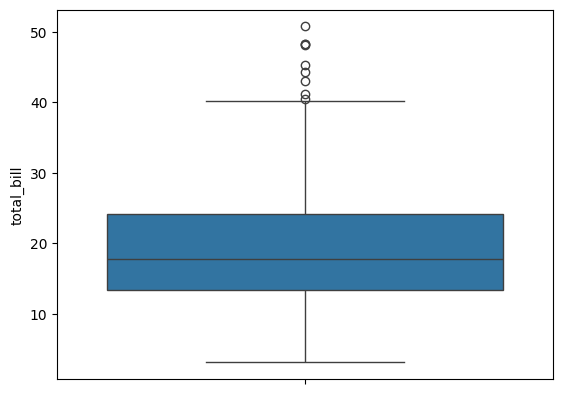

In [5]:
sns.boxplot(data = tips, y = 'total_bill')
plt.show()

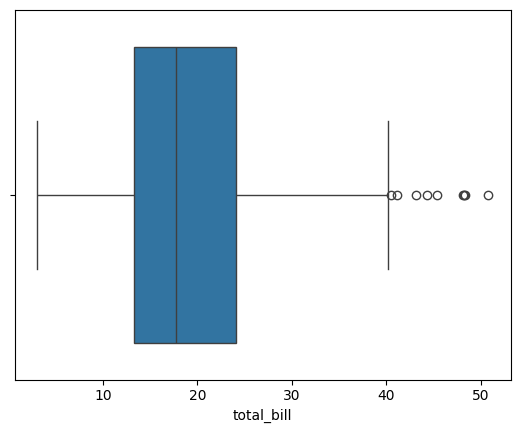

In [6]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

성별 tip의 box plot

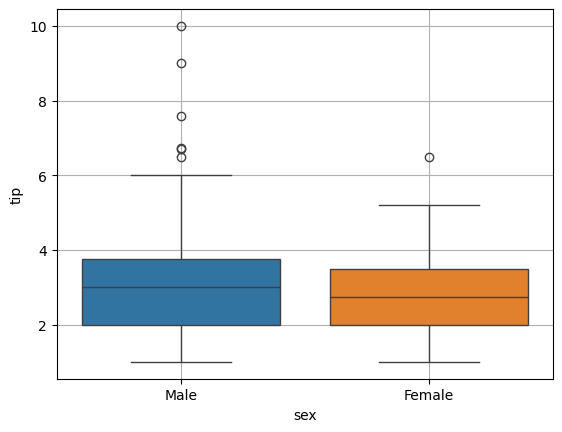

In [7]:
sns.boxplot(data=tips, x='sex', y='tip', hue='sex')
plt.grid()
plt.show()

In [8]:
tips[tips.sex=='Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [9]:
tips[tips.sex=='Female'].tip.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

요일별 tip의 box plot

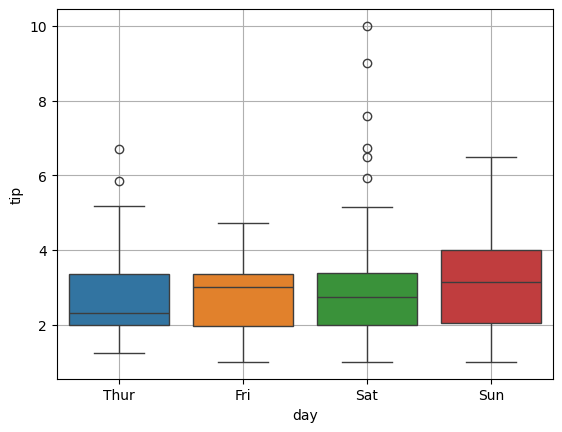

In [10]:
sns.boxplot(data = tips, x = 'day', y = 'tip', hue = 'day')
plt.grid()
plt.show()

subpllot(nrows=1, ncols=2)을 생성하고, 각각의 subplot에 흡연여부 별 tip의 box plot과 시간별 tip의 box plot

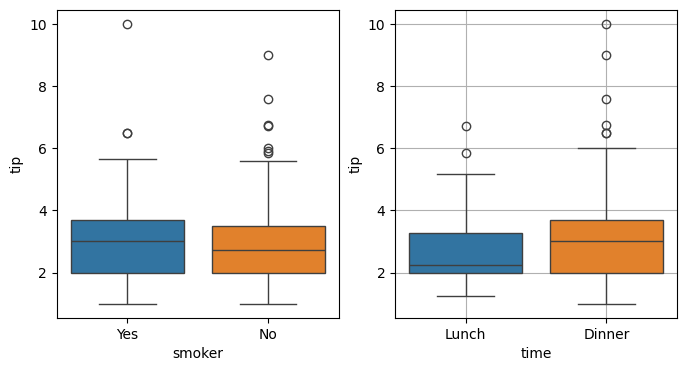

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
sns.boxplot(data=tips, x='smoker', y='tip', hue = 'smoker', ax=axes[0])
sns.boxplot(data=tips, x='time', y='tip', hue = 'time', ax=axes[1])
plt.grid()
plt.show()

# Histogram

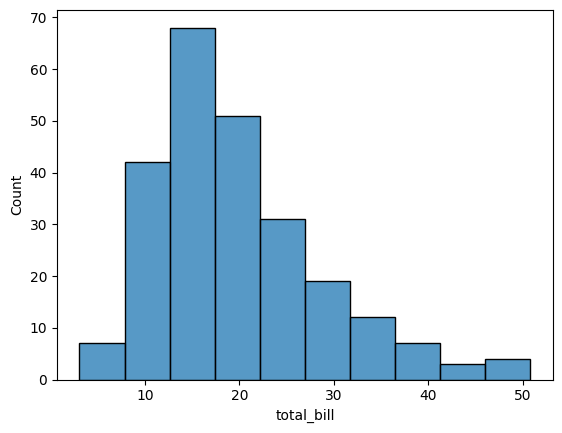

In [12]:
sns.histplot(data = tips, x = 'total_bill', bins = 10)
plt.show()

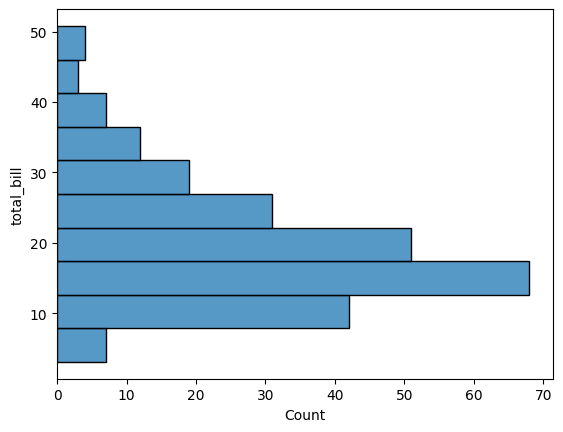

In [13]:
sns.histplot(data = tips, y = 'total_bill', bins = 10)
plt.show()

subplot(nrows=2, ncols=1) 2개를 생성, 위쪽 sublot에는 tip 의 box plot을, 아래쪽 subplot에는 tip의 histogram을 표현

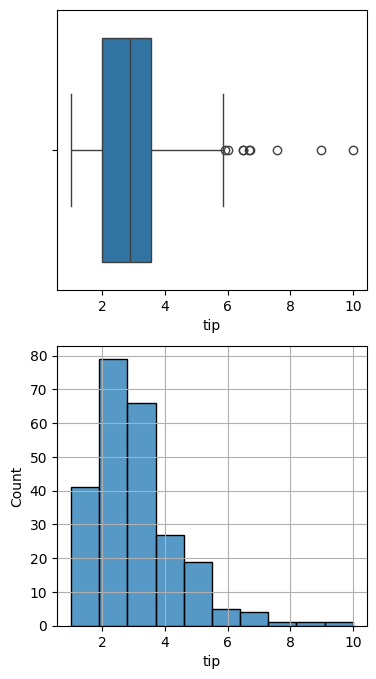

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (4, 8))
sns.boxplot(data = tips, x = 'tip', ax = axes[0])
sns.histplot(data = tips, x = 'tip', bins = 10, ax = axes[1])
plt.grid()
plt.show()

# 막대 그래프(bar plot)

## `countplot()`
카테고리(범주) 타입 변수의 빈도수를 막대로 표현한 그래프

성별 빈도수 세로 막대 그래프

In [15]:
tips.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

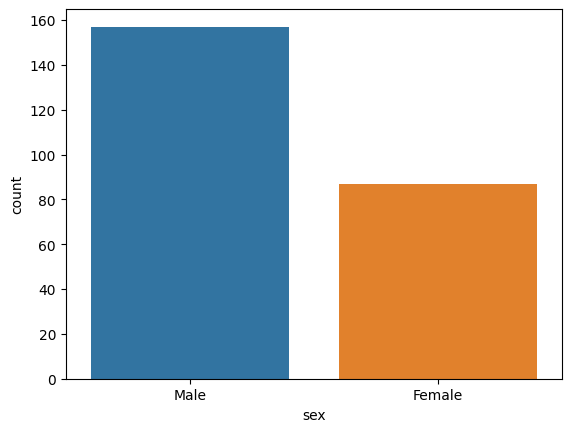

In [16]:
sns.countplot(data = tips, x='sex', hue='sex')
plt.show()

성별 빈도수 가로 막대 그래프

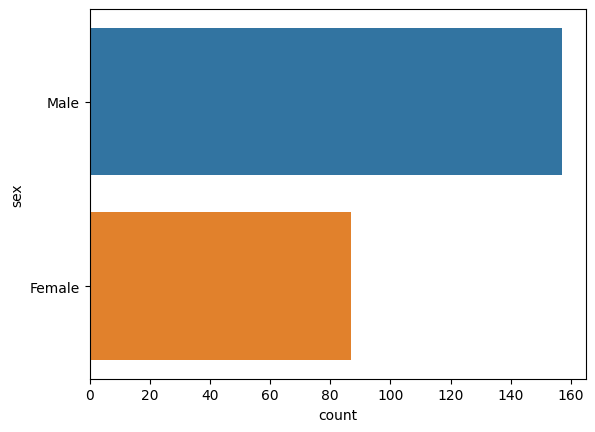

In [17]:
sns.countplot(data = tips, y = 'sex', hue = 'sex')
plt.show()

성별로 다른 색을 사용해서 요일별 성별 빈도수 그래프

In [18]:
# days = tips.day.unique()         -> 빈도수가 가장 많은 순서 (일, 토, 목, 금)
days = tips.day.cat.categories   # -> 일반적인 순서(목, 금, 토, 일)
genders = tips.sex.cat.categories
for d in days:
    subset_df = tips[(tips.day == d)]
    print(d)
    print(subset_df.sex.value_counts())


Thur
sex
Female    32
Male      30
Name: count, dtype: int64
Fri
sex
Male      10
Female     9
Name: count, dtype: int64
Sat
sex
Male      59
Female    28
Name: count, dtype: int64
Sun
sex
Male      58
Female    18
Name: count, dtype: int64


In [19]:
tips.groupby(by=['day', 'sex'], observed=True).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

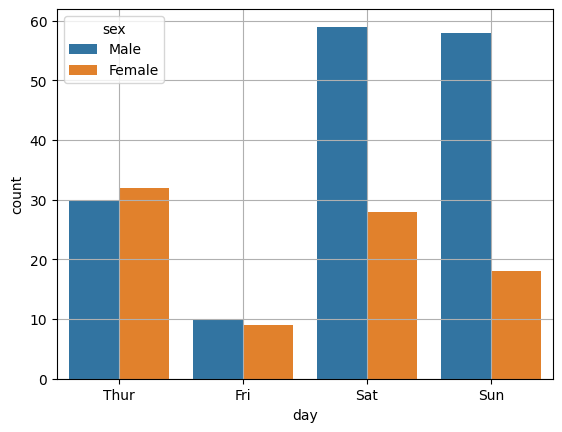

In [20]:
sns.countplot(data=tips, x='day', hue='sex')
plt.grid()
plt.show()

흡연/비흡연별로 다른 색을 사용해서 성별 흡연 여부별 빈도수 그래프

In [21]:
genders = tips.sex.cat.categories
for g in genders:
  subset_df = tips[tips.sex == g]
  print(g)
  print(subset_df.smoker.value_counts())

Male
smoker
No     97
Yes    60
Name: count, dtype: int64
Female
smoker
No     54
Yes    33
Name: count, dtype: int64


In [22]:
tips.groupby(by=['sex', 'smoker'], observed=True).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

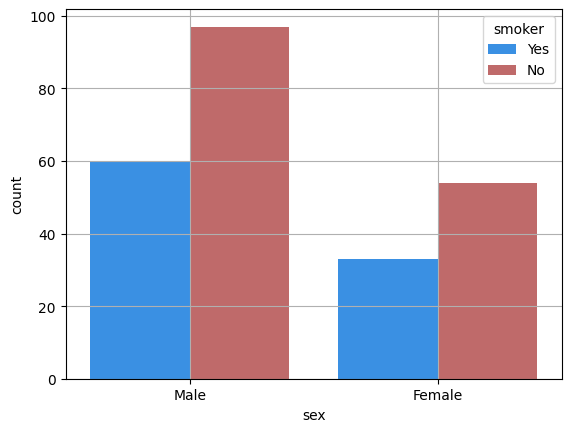

In [23]:
sns.countplot(data=tips, x='sex', hue='smoker', palette=['dodgerblue', 'indianred'])
plt.grid()
plt.show()

## `barplot()`
* 그룹별 변수의 기술 통계량(ex: 평균, 최댓값, 최솟값, ...)을 막대로 시각화
* 카테고리(범주) 타입 변수와 연속형(숫자) 변수를 함께 시각화

성별 팁의 평균을 막대 그래프로 표현

In [24]:
print(tips[tips.sex=='Male'].tip.mean())
print(tips[tips.sex=='Female'].tip.mean())

3.0896178343949043
2.8334482758620685


In [25]:
tips.groupby(by=['sex'], observed=True).tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

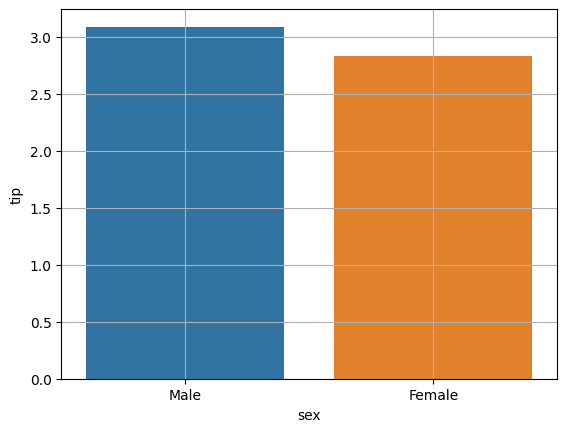

In [26]:
sns.barplot(data=tips, x='sex', y='tip', errorbar=None, estimator='mean', hue='sex')
# estimator 파라미터의 기본값은 'mean', 평균을 막대로 표현할 경우 estimator 값은 생략 가능.
plt.grid()
plt.show()

`barplot()` 함수를 사용한 빈도수 막대 그래프

성별 팁의 최댓값을 막대그래프로 표현

In [27]:
print(tips[tips.sex=='Male'].tip.max)
print(tips[tips.sex=='Female'].tip.max)

<bound method Series.max of 1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64>
<bound method Series.max of 0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64>


In [28]:
tips.groupby(by=['sex'], observed=True).tip.max()

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

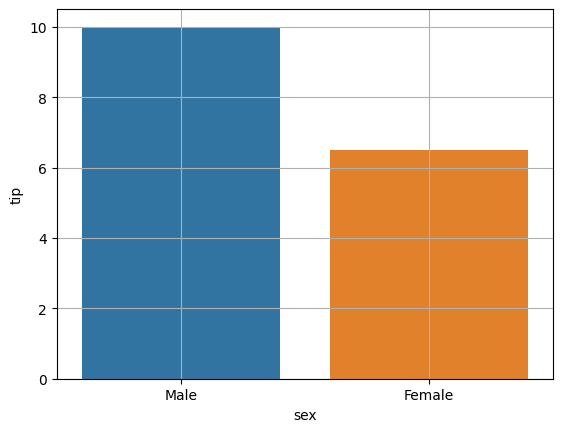

In [29]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', hue='sex', errorbar=None)
plt.grid()
plt.show()

요일별 팁의 평균을 가로 막대 그래프로 표현

In [30]:
tips.groupby(by=['day'], observed=True).tip.mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

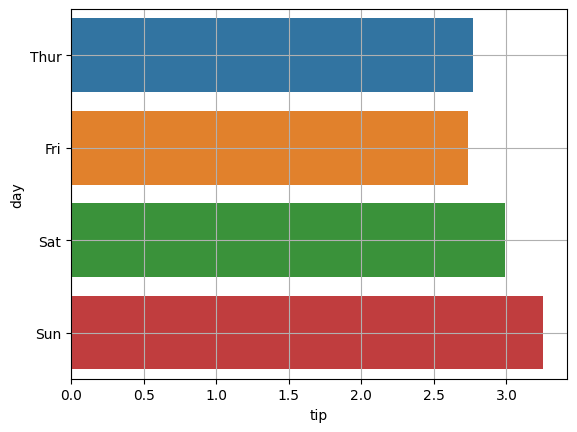

In [31]:
sns.barplot(data=tips, x='tip', y='day', hue='day', errorbar=None)
plt.grid()
plt.show()

요일별 성별 팁의 평균을 세로 막대 그래프로 표현, 성별로 막대 색을 다르게 표현

In [32]:
tips.groupby(by=['day', 'sex'], observed=True).tip.mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

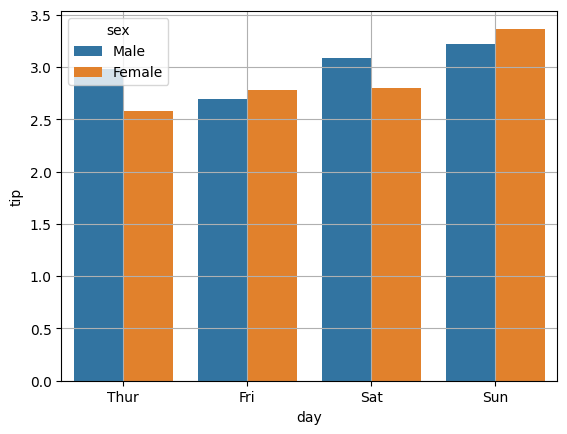

In [33]:
sns.barplot(data=tips, x='day', y='tip', hue='sex', errorbar=None)
plt.grid()
plt.show()

In [34]:
tips.groupby(by=['sex', 'day'], observed=True).tip.mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

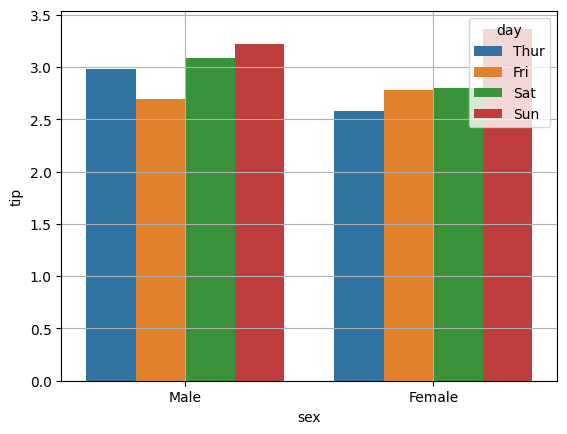

In [35]:
sns.barplot(data=tips, x='sex', y='tip', hue='day', errorbar=None)
plt.grid()
plt.show()

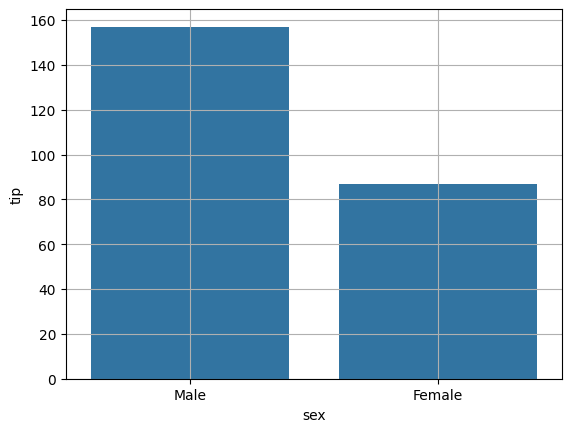

In [36]:
# barplot() 함수를 사용한 빈도수
sns.barplot(data=tips, x='sex', y='tip', estimator='size')
plt.grid()
plt.show()

# Scatter Plot(산점도)

## `scatterplot()`

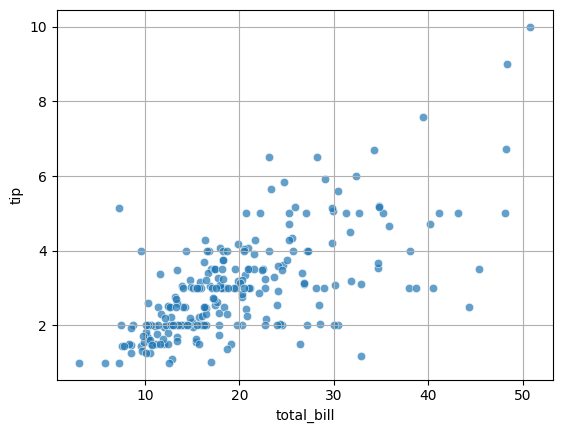

In [37]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.7)
plt.grid()
plt.show()

## `regplot()`
regression plot: 산점도 + 선형 회귀 직선

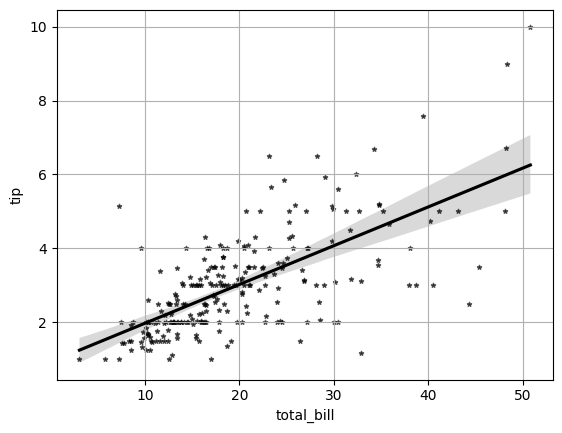

In [38]:
sns.regplot(data=tips, x='total_bill', y='tip', marker='*', color='black', scatter_kws={'s':10, 'alpha':0.6})
# scatter_kws: scatter 함수의 키워드 아규먼트 설정 -> scatterplot() 함수의 파라미터들을 dict 타입 객체로 전달
plt.grid()
plt.show()

## `jointplot()`
산점도 + 히스토그램

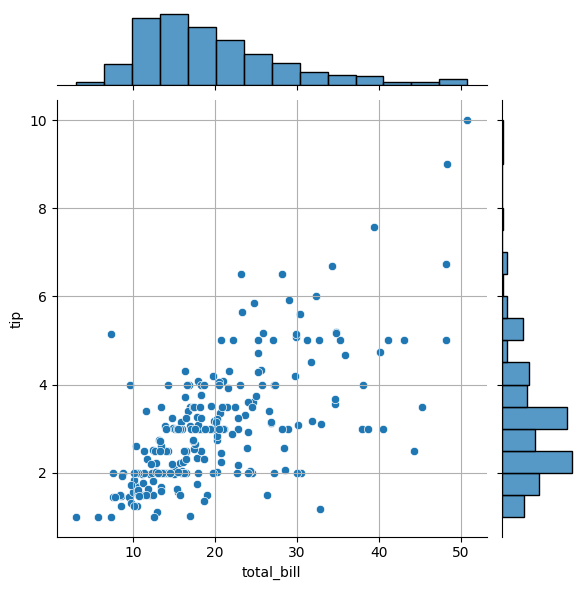

In [39]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.grid()
plt.show()

연습문제 1. tip ~ total_bill 산점도. marker의 색을 성별에 따라 다르게 시각화


연습문제 2. tip ~ total_bill 산점도. marker의 색을 성별에 따라 다르게, marker의 크기는 인원수(size)에 따라서 다르게 시각화


연습문제 3. tip ~ total_bill 산점도. marker의 색을 성별에 따라 다르게, marker의 모양은 흡연여부에 따라서 다르게 시각화

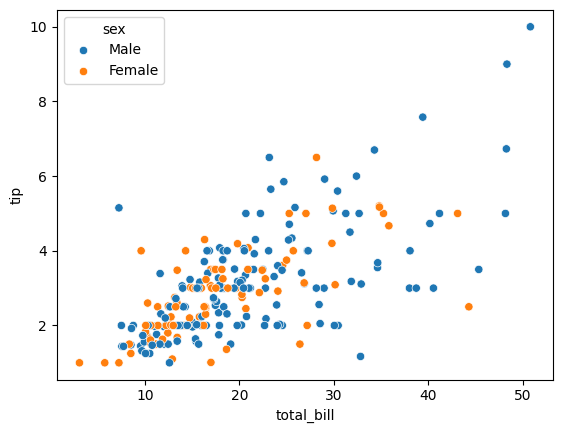

In [40]:
# 연습문제 1. tip ~ total_bill 산점도. marker의 색을 성별에 따라 다르게 시각화
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

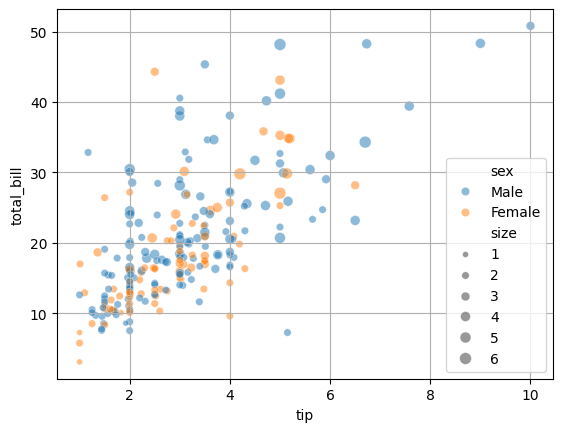

In [41]:
# 연습문제 2. tip ~ total_bill 산점도. marker의 색을 성별에 따라 다르게, marker의 크기는 인원수(size)에 따라서 다르게 시각화
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex', size='size', alpha=0.5)
plt.grid()
plt.show()

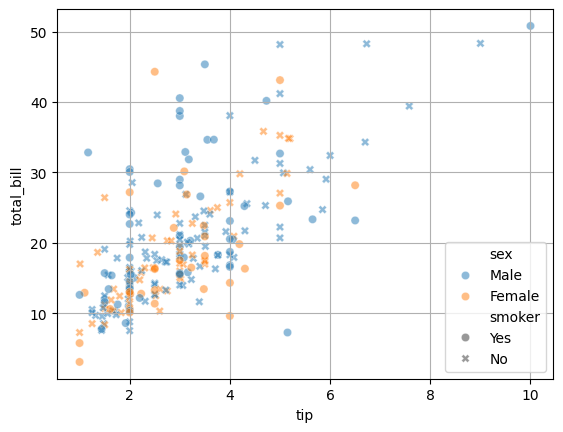

In [42]:
# 연습문제 3. tip ~ total_bill 산점도. marker의 색을 성별에 따라 다르게, marker의 모양은 흡연여부에 따라서 다르게 시각화
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex', style='smoker', alpha=0.5)
plt.grid()
plt.show()

# Line Plot(선 그래프)

In [43]:
np.random.seed(42)
df = pd.DataFrame(data={'day':np.arange(1, 11),
                        'price': np.random.rand(10)})
df

day     price
0    1  0.374540
1    2  0.950714
2    3  0.731994
3    4  0.598658
4    5  0.156019
5    6  0.155995
6    7  0.058084
7    8  0.866176
8    9  0.601115
9   10  0.708073

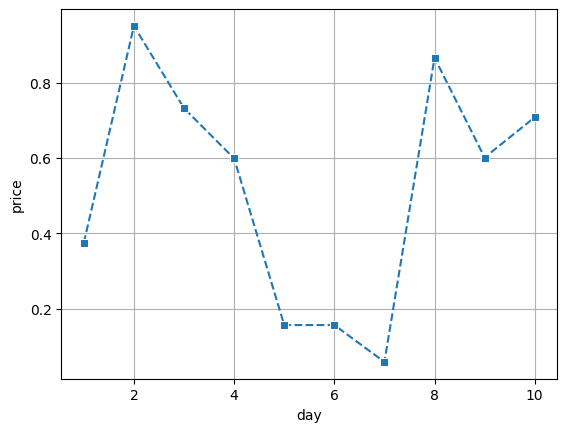

In [44]:
sns.lineplot(data=df, x='day', y='price', marker='s', linestyle = '--')  # markers -> 카테고리별로 마커의 모양을 다르게 쓸 때
plt.grid()
plt.show()

# Category Plot(범주 그래프)
카테고리(범주) 별로 subplot을 생성하고, 변수에 통계값을 모든 subplot에 같은 종류의 그래프로 시각화

In [45]:
tips.groupby(by=['sex', 'smoker', 'day']).tip.mean()

<ipython-input-45-6eb27b0ac837>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex', 'smoker', 'day']).tip.mean()


sex     smoker  day 
Male    Yes     Thur    3.058000
                Fri     2.741250
                Sat     2.879259
                Sun     3.521333
        No      Thur    2.941500
                Fri     2.500000
                Sat     3.256563
                Sun     3.115349
Female  Yes     Thur    2.990000
                Fri     2.682857
                Sat     2.868667
                Sun     3.500000
        No      Thur    2.459600
                Fri     3.125000
                Sat     2.724615
                Sun     3.329286
Name: tip, dtype: float64

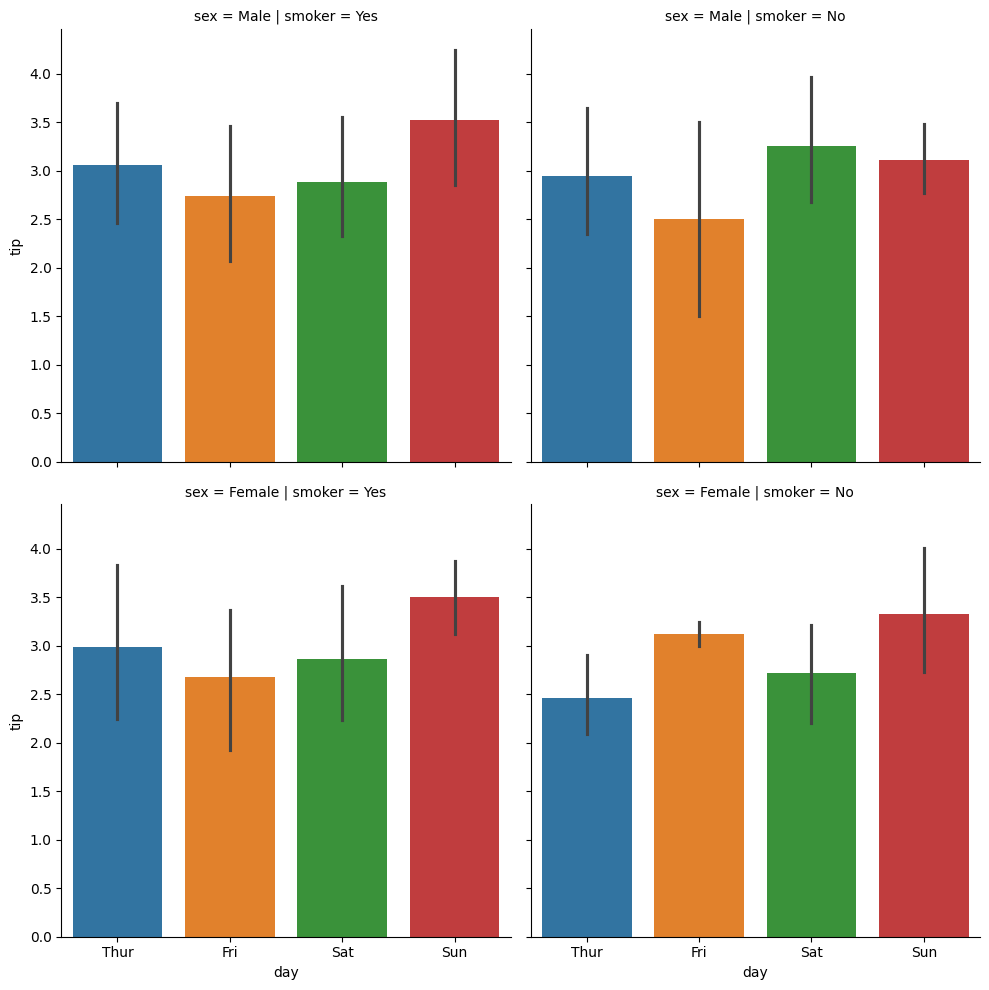

In [46]:
# 요일별(x축), 팁의 평균(y축) 막대 그래프
# 성별(subplot의 row), 흡연 여부(subplot의 columm)로 subplot들을 구분
sns.catplot(data=tips, x='day', y='tip',
            row='sex', col='smoker',          # row: subplot의 행을 나누는 기준(범주) / col: subplot의 열을 나누는 기준(범주)
            kind = 'bar',                     # kind: 그래프 종류
            hue='day'
            )                                 # 통계함수가 평균이 아닌 경우 -> estimator = 'brr brr'

plt.show()

연습문제 1. tips 데이터셋에서 요일별 tip의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성

연습문제 2. tips 데이터셋에서 요일별, 성별 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성

연습문제 3. tips 데이터셋에서 요일별 tip의 boxplot. 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성

In [47]:
tips.groupby(by=['smoker', 'time', 'day']).tip.mean()

<ipython-input-47-2f33fed91447>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['smoker', 'time', 'day']).tip.mean()


smoker  time    day 
Yes     Lunch   Thur    3.030000
                Fri     2.280000
                Sat          NaN
                Sun          NaN
        Dinner  Thur         NaN
                Fri     3.003333
                Sat     2.875476
                Sun     3.516842
No      Lunch   Thur    2.666364
                Fri     3.000000
                Sat          NaN
                Sun          NaN
        Dinner  Thur    3.000000
                Fri     2.750000
                Sat     3.102889
                Sun     3.167895
Name: tip, dtype: float64

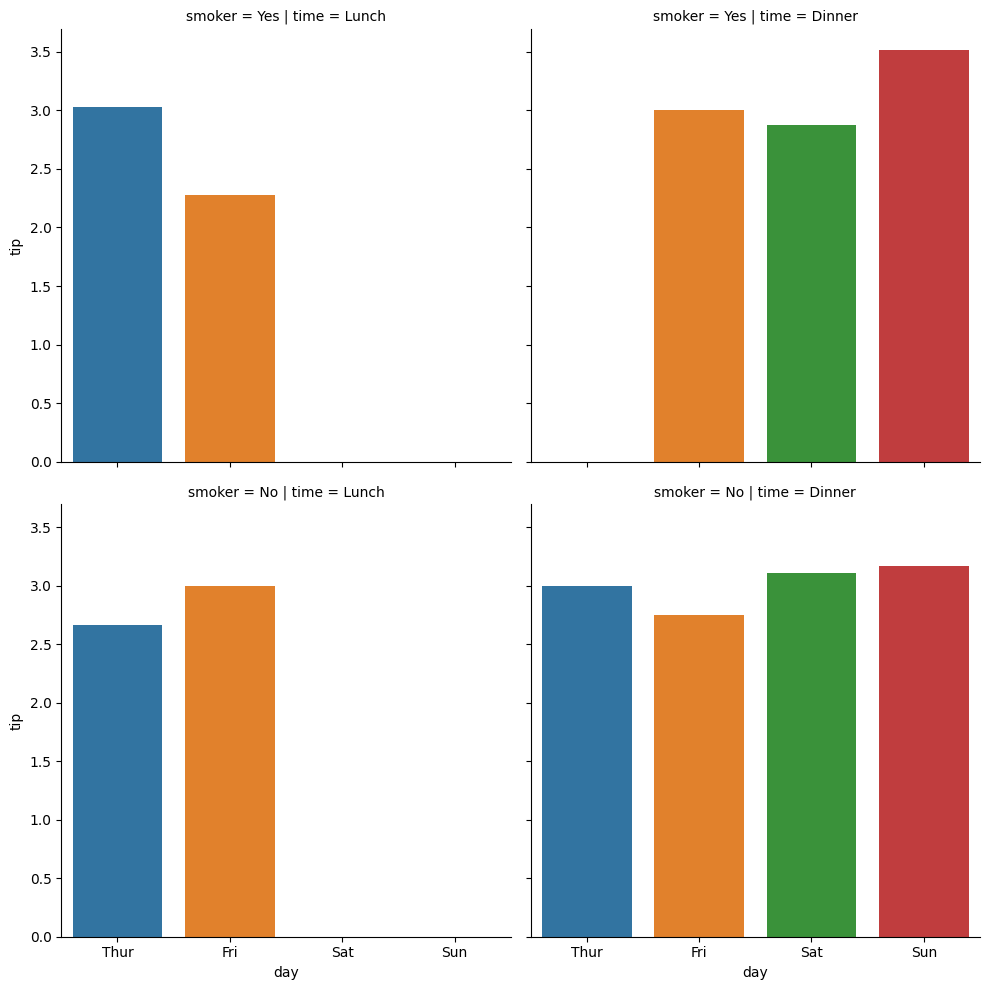

In [48]:
# 연습문제 1. tips 데이터셋에서 요일별 tip의 평균 막대 그래프
# 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성
sns.catplot(data=tips, x='day', y='tip', row='smoker', col='time', kind='bar', hue='day', errorbar=None)
plt.show()

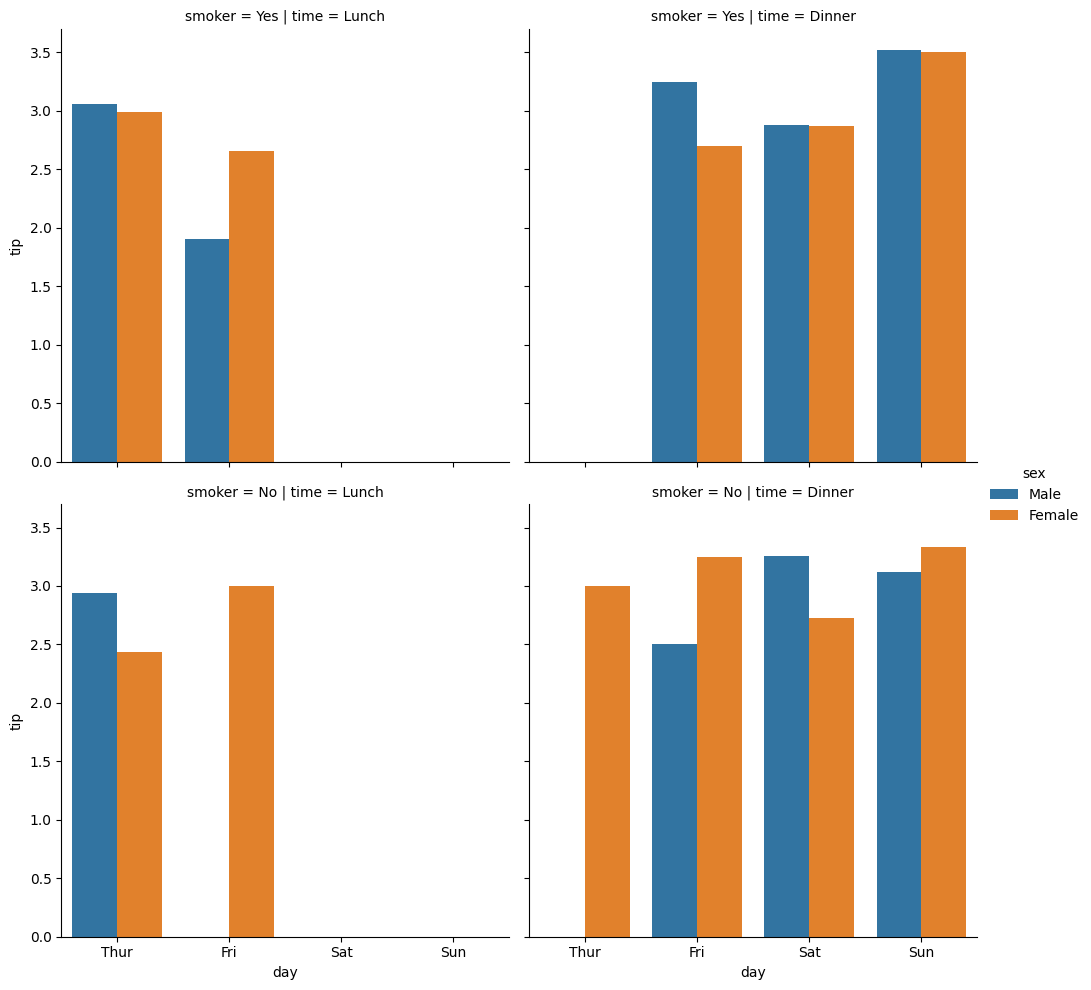

In [49]:
# 연습문제 2. tips 데이터셋에서 요일별, 성별 팁의 평균 막대 그래프
# 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성
sns.catplot(data=tips, x='day', y='tip', row='smoker', col='time', kind='bar', hue='sex', errorbar=None)
plt.show()

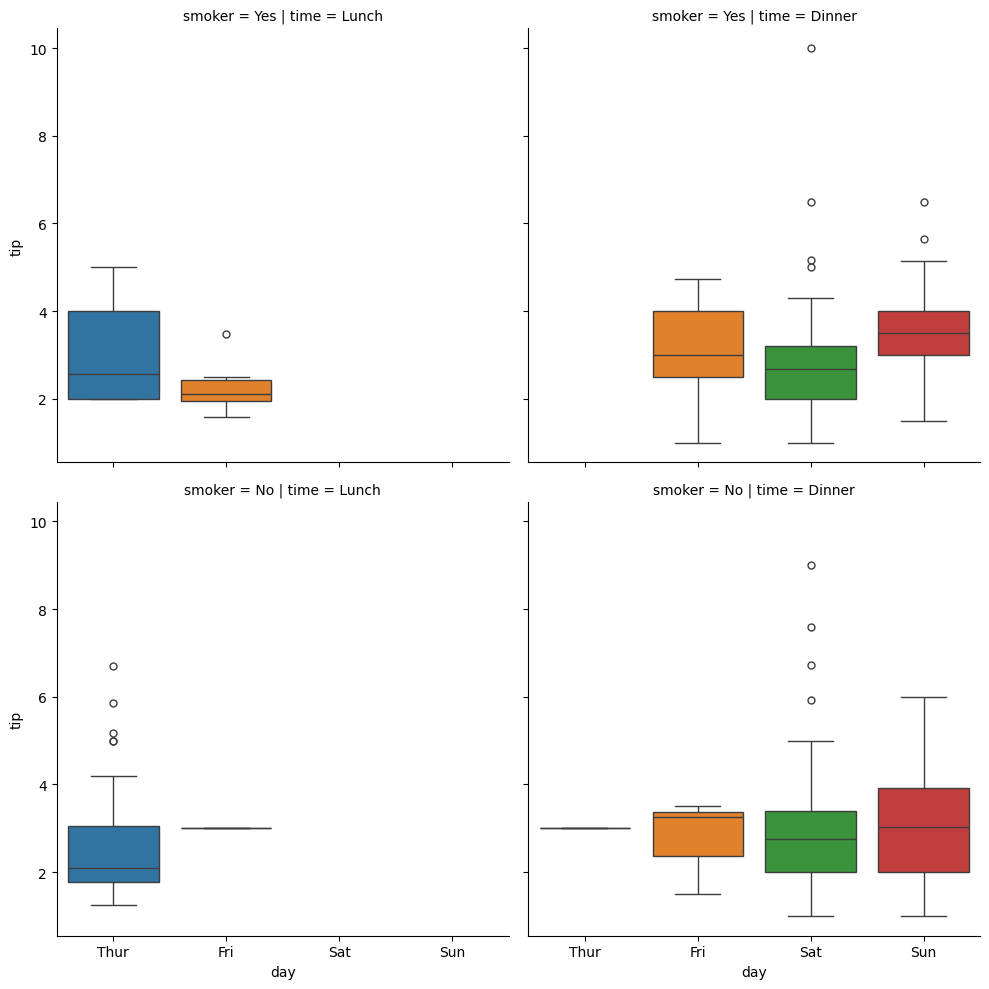

In [50]:
# 연습문제 3. tips 데이터셋에서 요일별 tip의 boxplot
# 흡연여부(subplot의 행), 시간(subplot의 열)으로 subplot을 나눠서 그래프 작성
sns.catplot(data=tips, x='day', y='tip', kind='box', row='smoker', col='time', hue='day')
plt.show()

# Exercise 1. iris 데이터셋

*   seaborn 패키지의  iris 데이터셋을 로드
*   iris 데이터 탐색 - 데이터프레임 일부 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수 빈도수
*   숫자 타입 변수(컬럼)들의 box plot
*   숫자 타입 변수(컬럼)들의 평균 막대 그래프
*   품종별 모든 연속형 변수들의 box plot
*   품종별 모든 연속형 변수들의 평균 막대 그래프
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화
*   모든 연속형 변수들 간의 상관관계(산점도). Hint: `pairplot()`

In [51]:
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [54]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [87]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [56]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [57]:
iris.groupby(by=['species']).mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

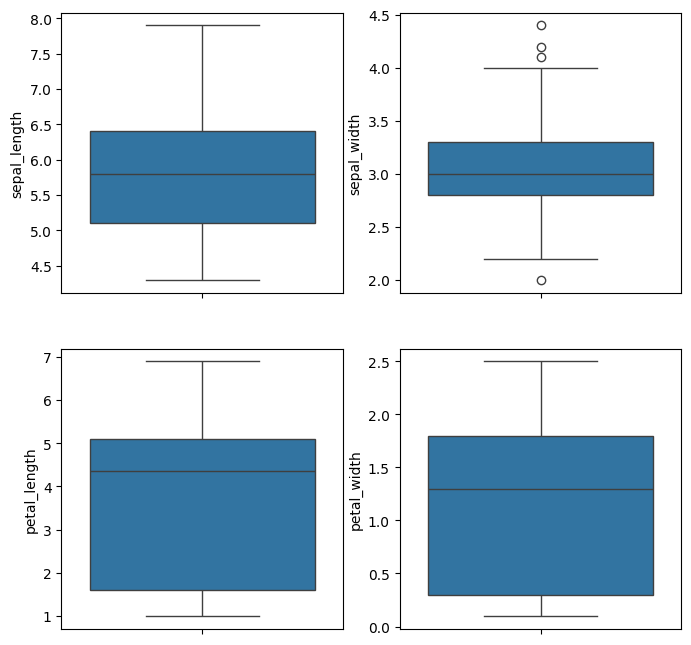

In [58]:
# 숫자 타입 변수(컬럼)들의 box plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,8))
sns.boxplot(data=iris, y='sepal_length', ax = axes[0][0])
sns.boxplot(data=iris, y='sepal_width', ax = axes[0][1])
sns.boxplot(data=iris, y='petal_length', ax = axes[1][0])
sns.boxplot(data=iris, y='petal_width', ax = axes[1][1])
plt.show()

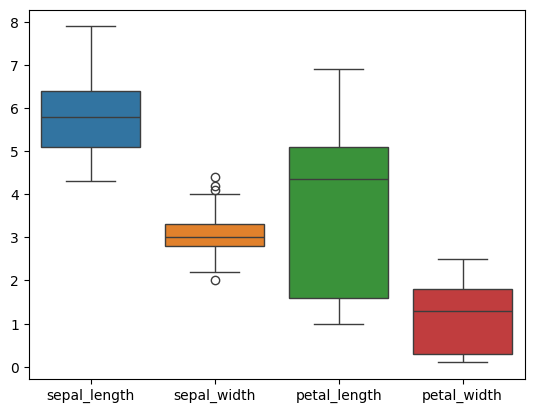

In [88]:
sns.boxplot(data=iris)
plt.show()

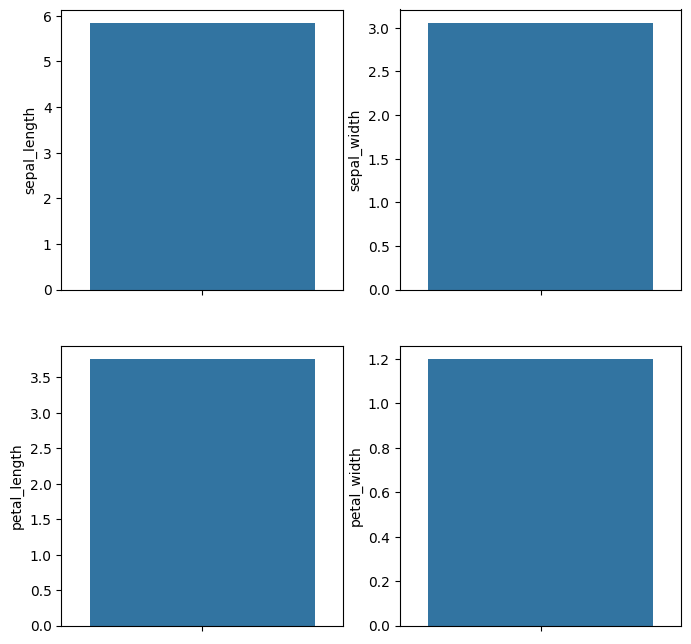

In [59]:
# 숫자 타입 변수(컬럼)들의 평균 막대 그래프
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,8))
sns.barplot(data=iris, y='sepal_length', ax = axes[0][0], errorbar=None)
sns.barplot(data=iris, y='sepal_width', ax = axes[0][1], errorbar=None)
sns.barplot(data=iris, y='petal_length', ax = axes[1][0], errorbar=None)
sns.barplot(data=iris, y='petal_width', ax = axes[1][1], errorbar=None)
plt.show()

In [60]:
s_l = iris.sepal_length.mean()
s_w = iris.sepal_width.mean()
p_l = iris.petal_length.mean()
p_w = iris.petal_width.mean()
print(f'sepal_length의 평균: {s_l}')
print(f'sepal_width의 평균: {s_w}')
print(f'petal_length의 평균: {p_l}')
print(f'petal_width의 평균: {p_w}')

sepal_length의 평균: 5.843333333333334
sepal_width의 평균: 3.0573333333333337
petal_length의 평균: 3.7580000000000005
petal_width의 평균: 1.1993333333333336


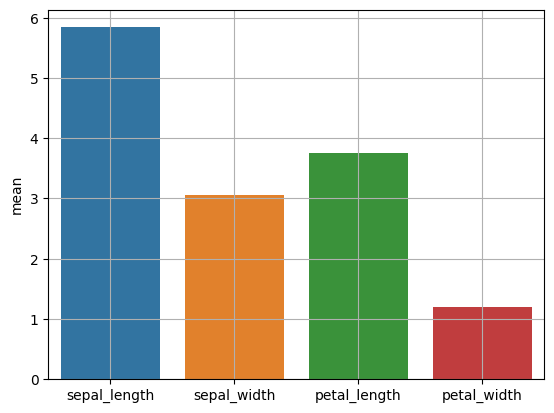

In [92]:
sns.barplot(data=iris, errorbar=None)
plt.ylabel('mean')
plt.grid()
plt.show()

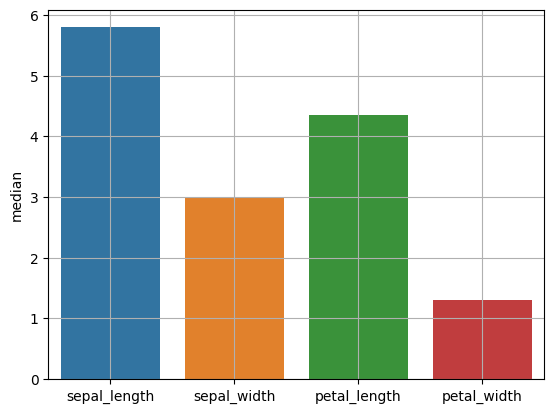

In [94]:
# 숫자 타입 변수들의 중위값(Median) 막대 그래프
sns.barplot(data=iris, estimator=np.median, errorbar=None)  ## (= estimator='median')
# estimator 파라미터: 함수 이름을 문자열로 전달('median')하거나 또는 함수 객체를 전달(np.median)
plt.ylabel('median')
plt.grid()
plt.show()

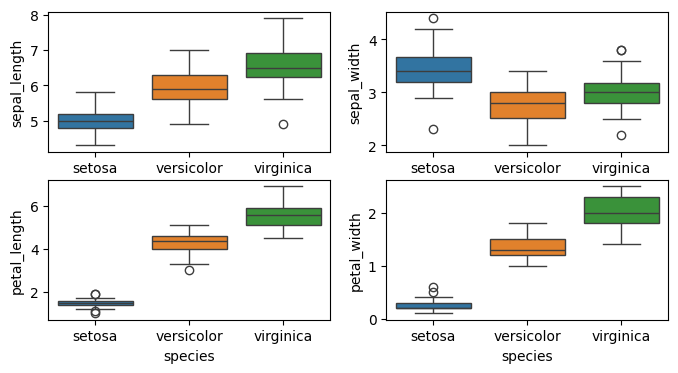

In [61]:
# 품종별 모든 연속형 변수들의 box plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,4))
sns.boxplot(data=iris, x='species', y='sepal_length', ax = axes[0][0], hue='species')
sns.boxplot(data=iris, x='species', y='sepal_width', ax = axes[0][1], hue='species')
sns.boxplot(data=iris, x='species', y='petal_length', ax = axes[1][0], hue='species')
sns.boxplot(data=iris, x='species', y='petal_width', ax = axes[1][1], hue='species')
plt.show()

In [116]:
# pandas.melt(): 가로 방향 데이터를 세로 방향 데이터로 변환
iris.melted = pd.melt(iris,
                      id_vars=['species'],
                      value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                      var_name='measurement')  # 새로 생긴 컬럼의 이름 설정

iris.melted

<ipython-input-116-5d28c4b8ab69>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris.melted = pd.melt(iris,


species   measurement  value
0       setosa  sepal_length    5.1
1       setosa  sepal_length    4.9
2       setosa  sepal_length    4.7
3       setosa  sepal_length    4.6
4       setosa  sepal_length    5.0
..         ...           ...    ...
595  virginica   petal_width    2.3
596  virginica   petal_width    1.9
597  virginica   petal_width    2.0
598  virginica   petal_width    2.3
599  virginica   petal_width    1.8

[600 rows x 3 columns]

In [126]:
iris.melted = pd.melt(iris,
                      id_vars=['species'],
                      value_vars=iris.columns[:-1],
                      var_name='measurement')

iris.melted

species   measurement  value
0       setosa  sepal_length    5.1
1       setosa  sepal_length    4.9
2       setosa  sepal_length    4.7
3       setosa  sepal_length    4.6
4       setosa  sepal_length    5.0
..         ...           ...    ...
595  virginica   petal_width    2.3
596  virginica   petal_width    1.9
597  virginica   petal_width    2.0
598  virginica   petal_width    2.3
599  virginica   petal_width    1.8

[600 rows x 3 columns]

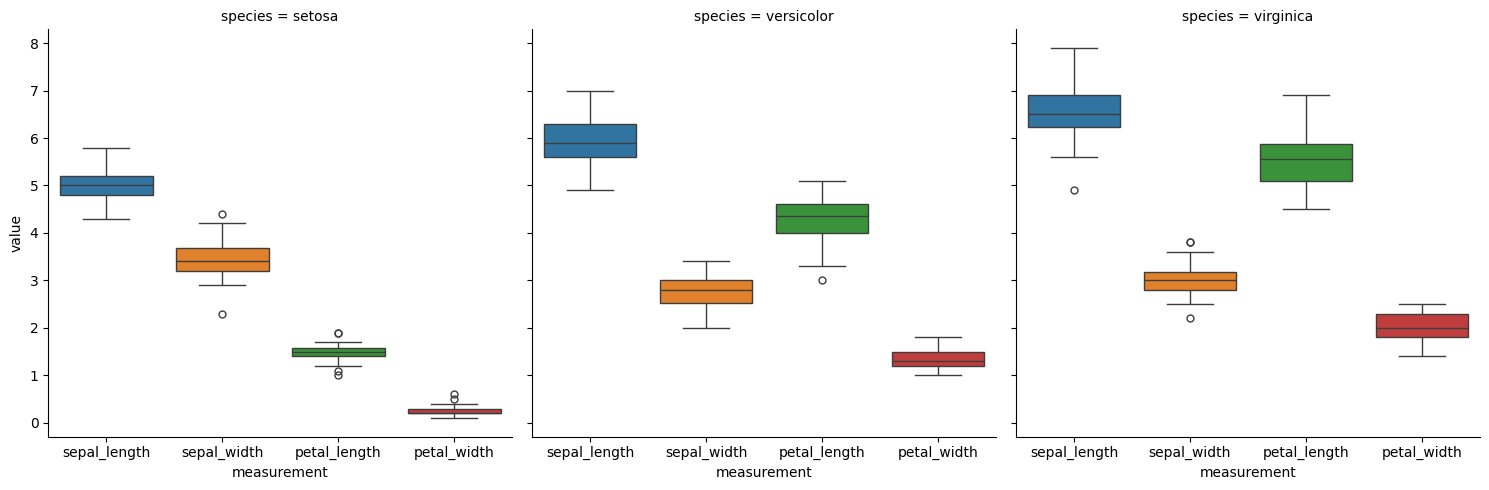

In [119]:
sns.catplot(data=iris.melted, kind='box',x='measurement', y='value',  hue='measurement', col='species')
plt.show()

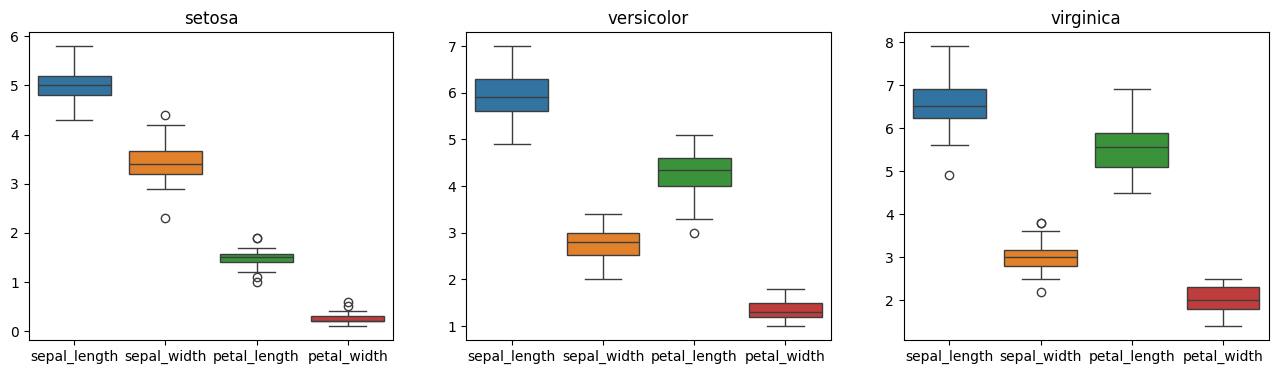

In [103]:
# 품종별
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16,4))

species = iris.species.unique()
for i, s in enumerate(species):
  sns.boxplot(iris[iris.species == s], ax=axes[i])
  axes[i].set_title(s)

plt.show()

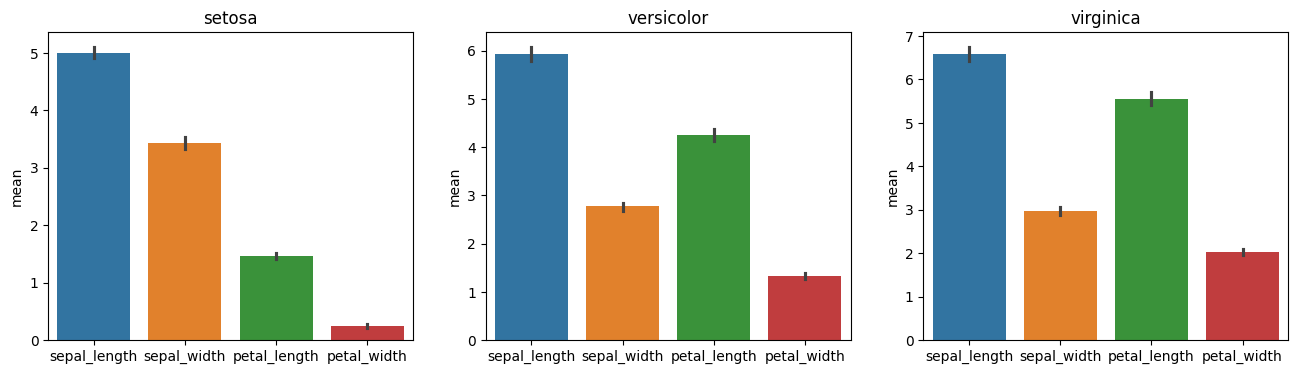

In [113]:
# 품종별 숫자 타입 변수들의 평균 막대 그래프
species = iris.species.unique()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for i, s, in enumerate(species):
  sns.barplot(data=iris[iris.species == s], ax=axes[i])
  axes[i].set_title(s)
  axes[i].set_ylabel('mean')

plt.show()

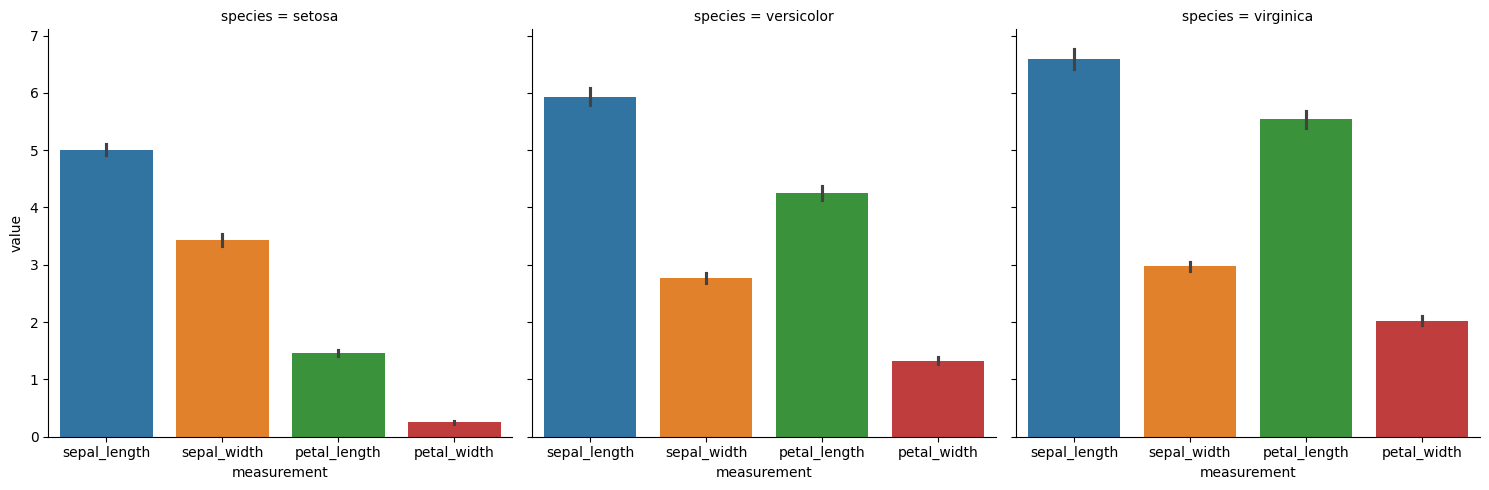

In [121]:
sns.catplot(data=iris.melted, kind='bar', estimator=np.mean, x='measurement', y='value', col='species', hue='measurement')
plt.show()

In [114]:
iris.groupby(by=['species'])[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

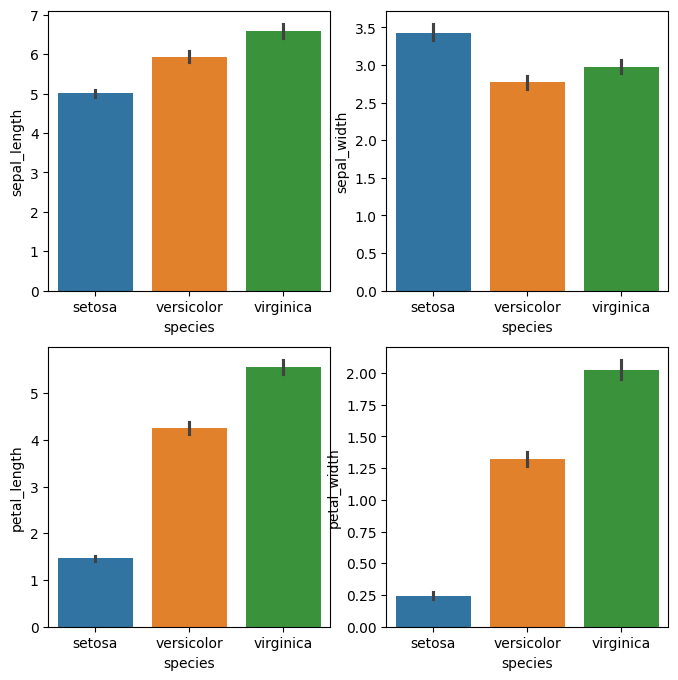

In [62]:
#  품종별 모든 연속형 변수들의 평균 막대 그래프
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,8))
sns.barplot(data=iris, x='species', y='sepal_length', ax = axes[0][0], hue='species')
sns.barplot(data=iris, x='species', y='sepal_width', ax = axes[0][1], hue='species')
sns.barplot(data=iris, x='species', y='petal_length', ax = axes[1][0], hue='species')
sns.barplot(data=iris, x='species', y='petal_width', ax = axes[1][1], hue='species')
plt.show()

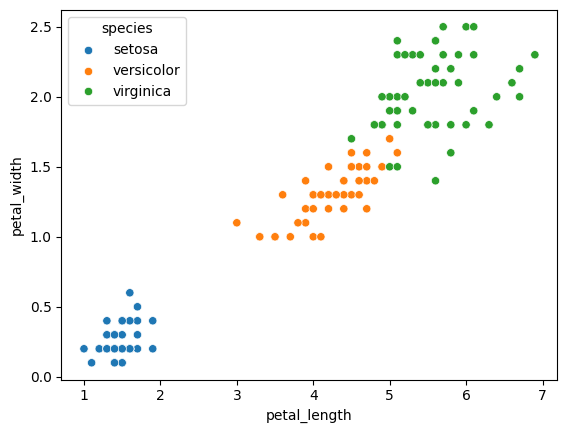

In [127]:
# petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화
sns.scatterplot(data=iris, x='petal_length', y= 'petal_width', hue='species')
plt.show()

## Pair Plot

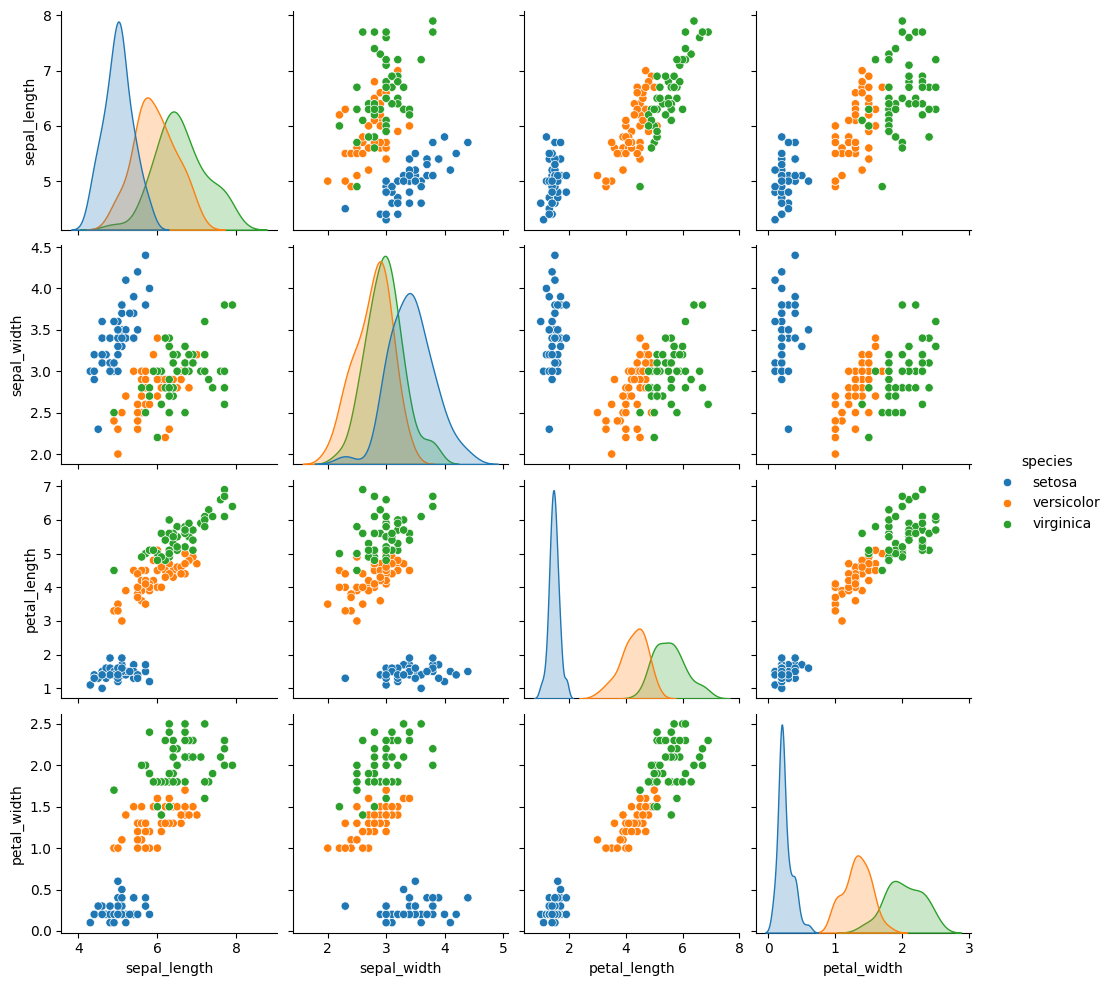

In [130]:
# 모든 연속형 변수들 간의 상관관계(산점도). Hint: pairplot()
sns.pairplot(data=iris, hue='species')
plt.show()

# Exercise 2. mpg 데이터 셋

MPG(Mile Per Gallon): 자동차 연비

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cyliners 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot

In [133]:
mpg = sns.load_dataset('mpg')
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [66]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [131]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [68]:
mpg.tail()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin             name  
393          82     usa  ford mustang gl  
394          82  europe        vw pickup  
395          82     usa    dodge rampage  
396          82     usa      ford ranger  
397          82     usa       chevy s-10

In [69]:
mpg.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

In [134]:
mpg.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [141]:
mpg.name.value_counts()

name
ford pinto             6
ford maverick          5
amc matador            5
toyota corolla         5
amc hornet             4
                      ..
amc concord dl         1
volkswagen rabbit l    1
mazda glc custom l     1
mazda glc custom       1
chevy s-10             1
Name: count, Length: 305, dtype: int64

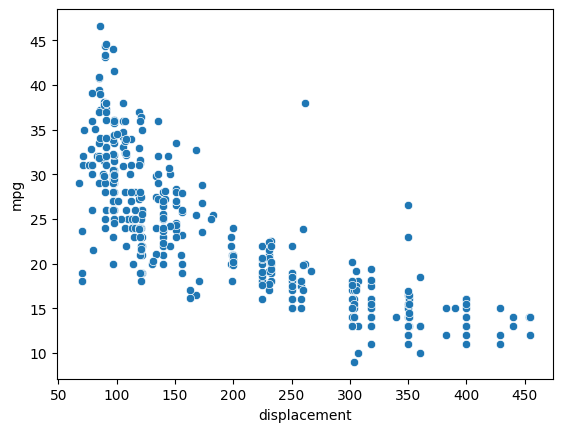

In [158]:
# 산점도
sns.scatterplot(data=mpg, x='displacement', y='mpg')
plt.show()

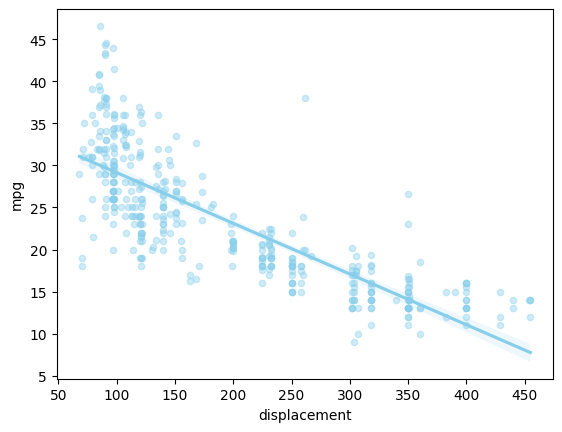

In [156]:
# regplot = scatterplot + 회귀(regression) 직선
sns.regplot(data=mpg, x='displacement', y='mpg',scatter_kws={'alpha':0.4, 'sizes':[20]}, color='skyblue')
plt.show()

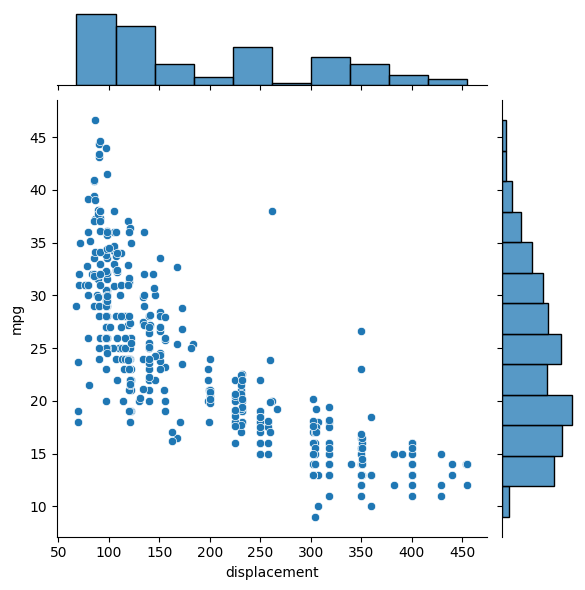

In [157]:
# jointplot = scatterplot + histogram
sns.jointplot(data=mpg, x='displacement', y='mpg')
plt.show()

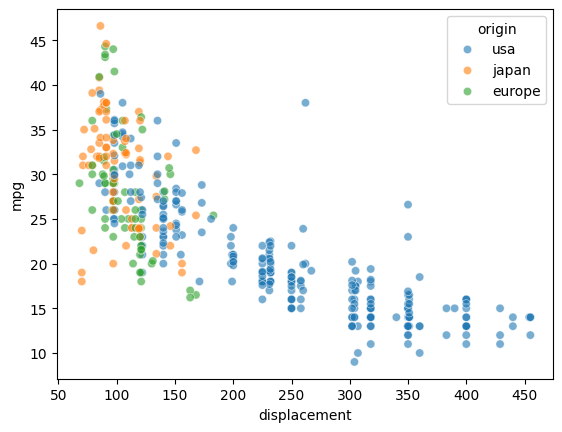

In [161]:
# scatterplot을 origin 별로 색을 다르게 시각화
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='origin', alpha=0.6)
plt.show()

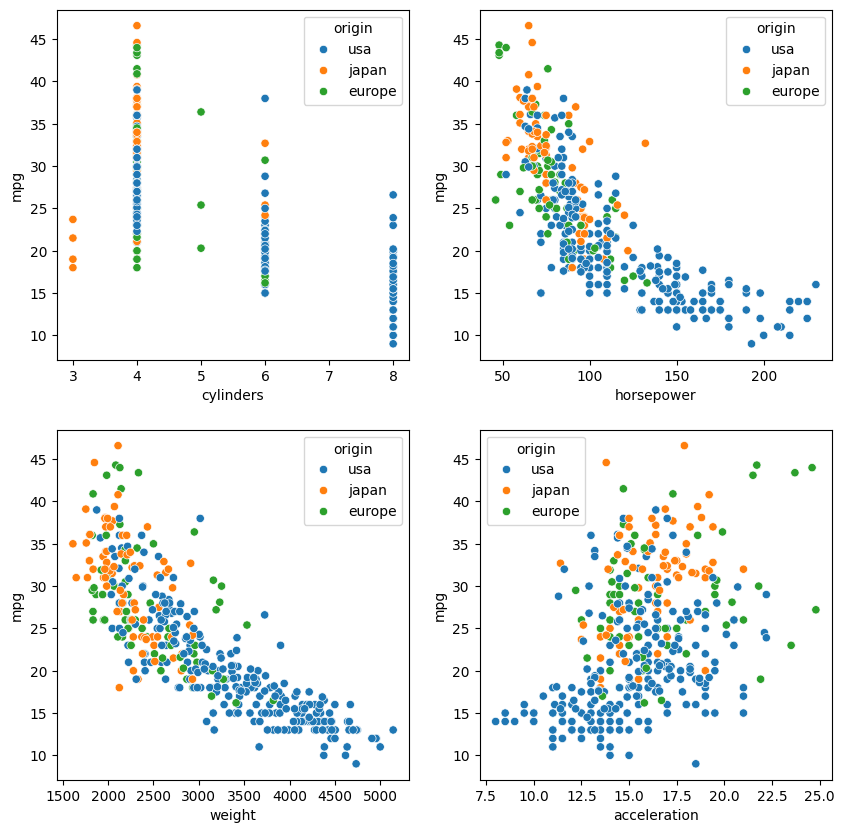

In [163]:
# 산점도
## 2x2 모양의 subplot을 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10, 10))                      # 2x2 형태의 subplot 생성
sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=axes[0][0], hue='origin')      # mpg ~ cylinders(실린더 개수)
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=axes[0][1], hue='origin')     # mpg ~ horsepower(마력)
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=axes[1][0], hue='origin')         # mpg ~ weight(무게)
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=axes[1][1], hue='origin')   # mpg ~ acceleration(가속도)
plt.show()

horse power(마력)와 weight(무게)는 mpg(연비)와 상관 관계가 크고, acceleration(가속도)는 연비와 상관 관계가 적다.

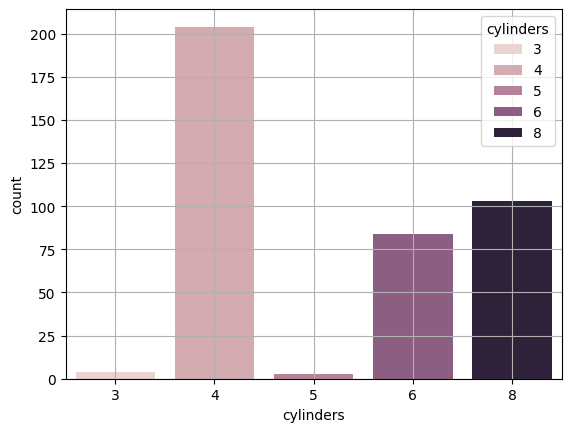

In [164]:
# 빈도수 막대 그래프
## cyliners 빈도수
sns.countplot(data=mpg, x='cylinders', hue='cylinders')
plt.grid()
plt.show()

In [165]:
mpg.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

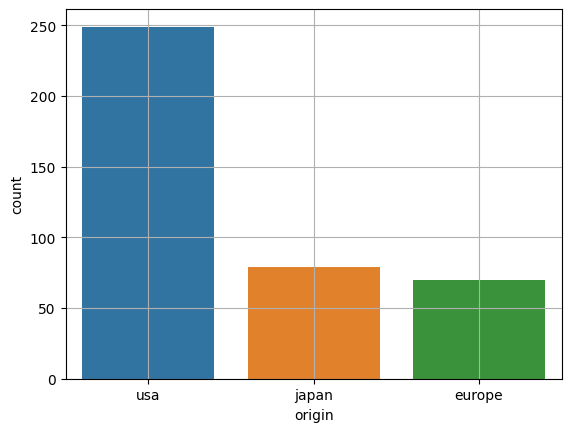

In [168]:
# 빈도수 막대 그래프
## origin 빈도수
sns.countplot(data=mpg, x='origin', hue='origin')
plt.grid()
plt.show()

In [166]:
mpg.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

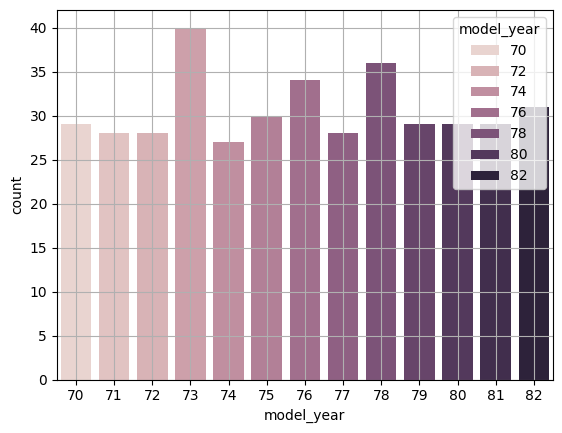

In [169]:
# 빈도수 막대 그래프
## model_year 빈도수
sns.countplot(data=mpg, x='model_year', hue='model_year')
plt.grid()
plt.show()

In [183]:
model_year_counts = mpg.model_year.value_counts()
print(type(model_year_counts))
print(model_year_counts.index)
print(model_year_counts.values)

<class 'pandas.core.series.Series'>
Index([73, 78, 76, 82, 75, 80, 79, 81, 70, 71, 72, 77, 74], dtype='int64', name='model_year')
[40 36 34 31 30 29 29 29 29 28 28 28 27]


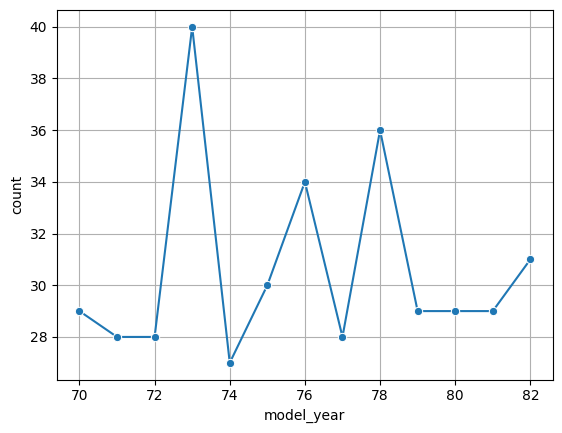

In [186]:
# 빈도수 막대 그래프
## model_year 빈도수 -> line plot
sns.lineplot(x=model_year_counts.index, y=model_year_counts, marker='o')
plt.grid()
plt.show()

In [190]:
mpg.groupby(by=['origin', 'cylinders']).name.count()

origin  cylinders
europe  4             63
        5              3
        6              4
japan   3              4
        4             69
        6              6
usa     4             72
        6             74
        8            103
Name: name, dtype: int64

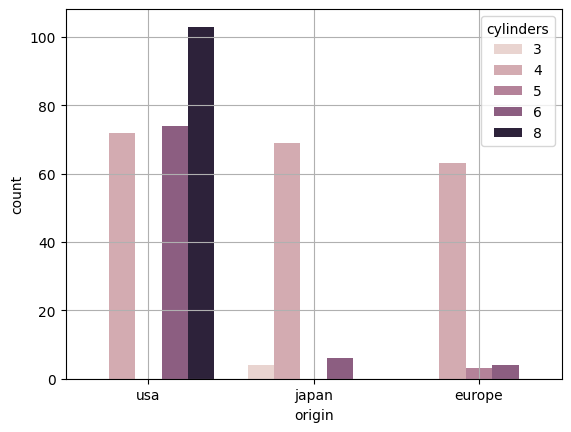

In [78]:
# 빈도수 막대 그래프
## origin 별, cylinders 별 빈도수
sns.countplot(data=mpg, x='origin', hue='cylinders')
plt.grid()
plt.show()

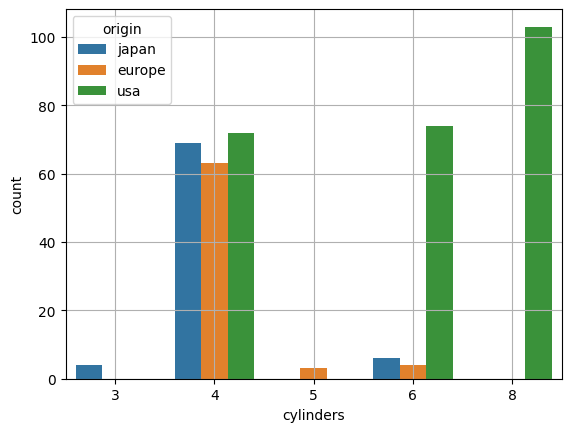

In [191]:
sns.countplot(data=mpg, x='cylinders', hue='origin')
plt.grid()
plt.show()

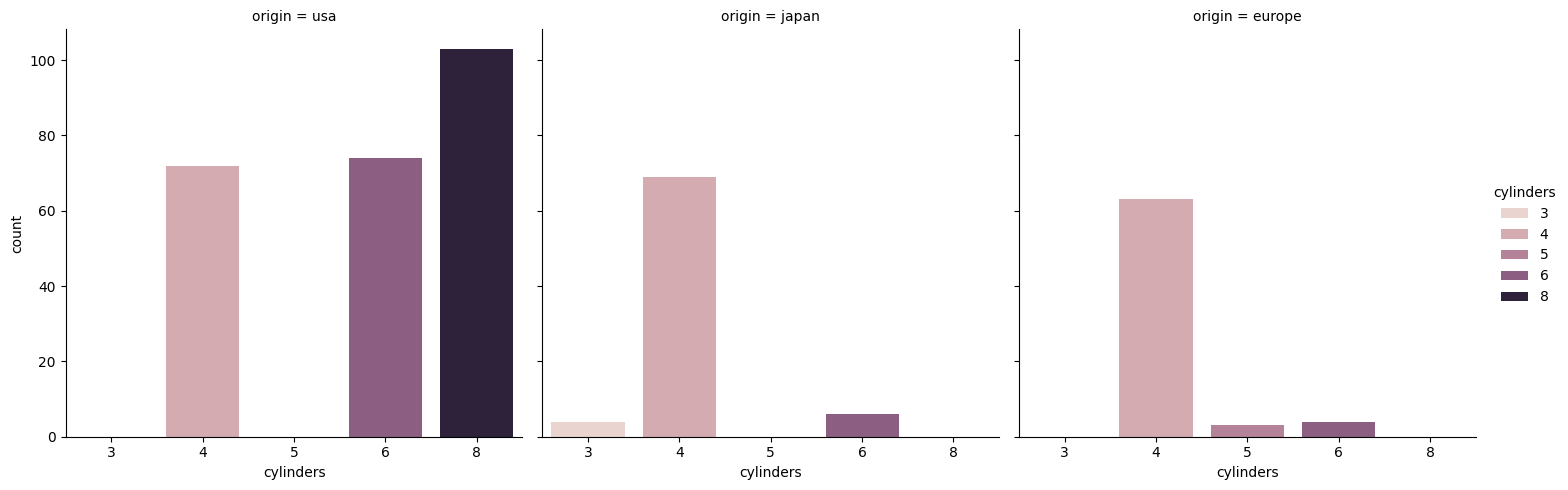

In [195]:
sns.catplot(data=mpg, x='cylinders', kind='count', col='origin', hue='cylinders')
plt.show()

## 그룹별 통계 막대 그래프(Bar Plot)

In [79]:
cc = mpg.cylinders.unique()
for c in cc:
  subset_df = mpg[mpg.cylinders == c]
  print(f'{c}의 중앙값: {subset_df.mpg.median()}')

8의 중앙값: 14.0
4의 중앙값: 28.25
6의 중앙값: 19.0
3의 중앙값: 20.25
5의 중앙값: 25.4


In [80]:
oo = mpg.origin.unique()
for o in oo:
  subset_df = mpg[mpg.origin == o]
  print(f'{o}의 중앙값: {subset_df.mpg.median()}')

usa의 중앙값: 18.5
japan의 중앙값: 31.6
europe의 중앙값: 26.5


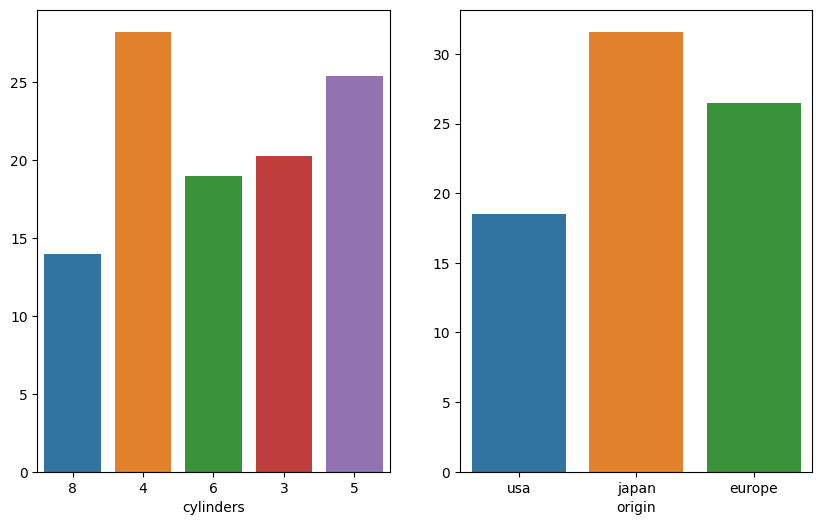

In [193]:
# 통계량 막대 그래프 - 2개의 subplot 생성
## cylinders 별 mpg의 중앙값(median)
## origin 별 mpg의 중앙값

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 6))

for c in cc:
  subset_df = mpg[mpg.cylinders == c]
  sns.barplot(data=subset_df, x='cylinders', y=subset_df.mpg.median(), ax=axes[0])

for o in oo:
  subset_df = mpg[mpg.origin == o]
  sns.barplot(data=subset_df, x='origin', y=subset_df.mpg.median(), ax=axes[1])

plt.show()

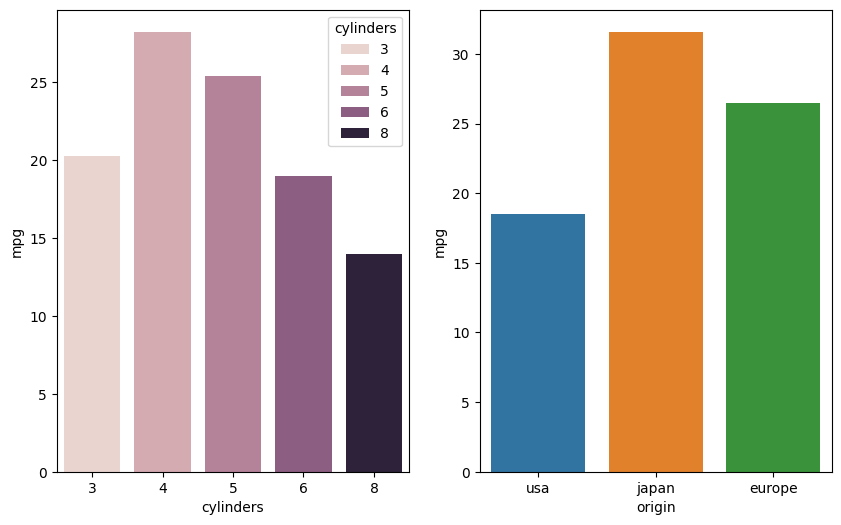

In [200]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 6))
sns.barplot(data=mpg, x='cylinders', y='mpg', estimator=np.median, hue='cylinders', errorbar=None, ax=axes[0])
sns.barplot(data=mpg, x='origin', y='mpg', estimator=np.median, hue='origin', errorbar=None, ax=axes[1])
plt.show()

## Box Plot

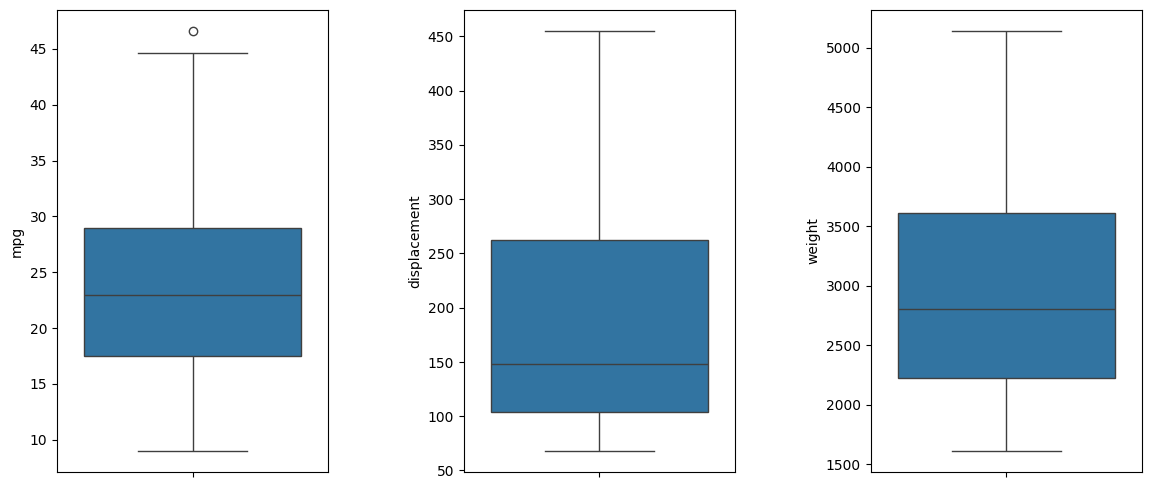

In [207]:
# Box Plot
## 3개의 subplot을 생성 - mpg, displacement, weight box plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (14, 6))
sns.boxplot(data=mpg, y='mpg', ax=axes[0])
sns.boxplot(data=mpg, y='displacement', ax=axes[1])
sns.boxplot(data=mpg, y='weight', ax=axes[2])

plt.subplots_adjust(wspace=0.5)
plt.show()

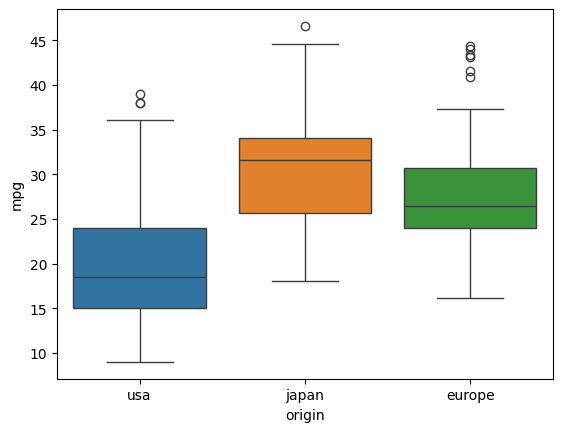

In [83]:
# Box Plot
## origin 별 mpg box plot
sns.boxplot(data=mpg, x='origin', y='mpg', hue='origin')
plt.show()

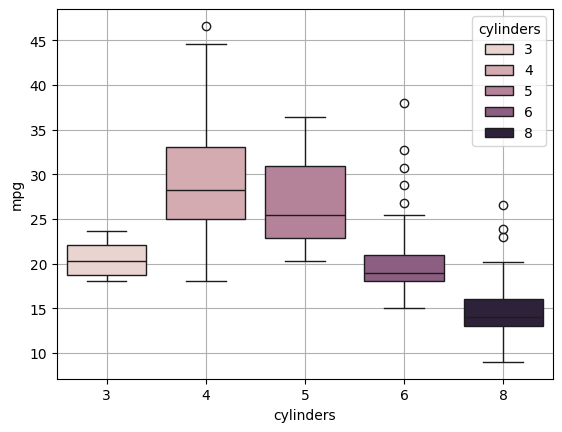

In [213]:
sns.boxplot(data=mpg, x='cylinders', y='mpg', hue='cylinders')
plt.grid()
plt.show()

실린더 개수별, 지역별 연비 box plot

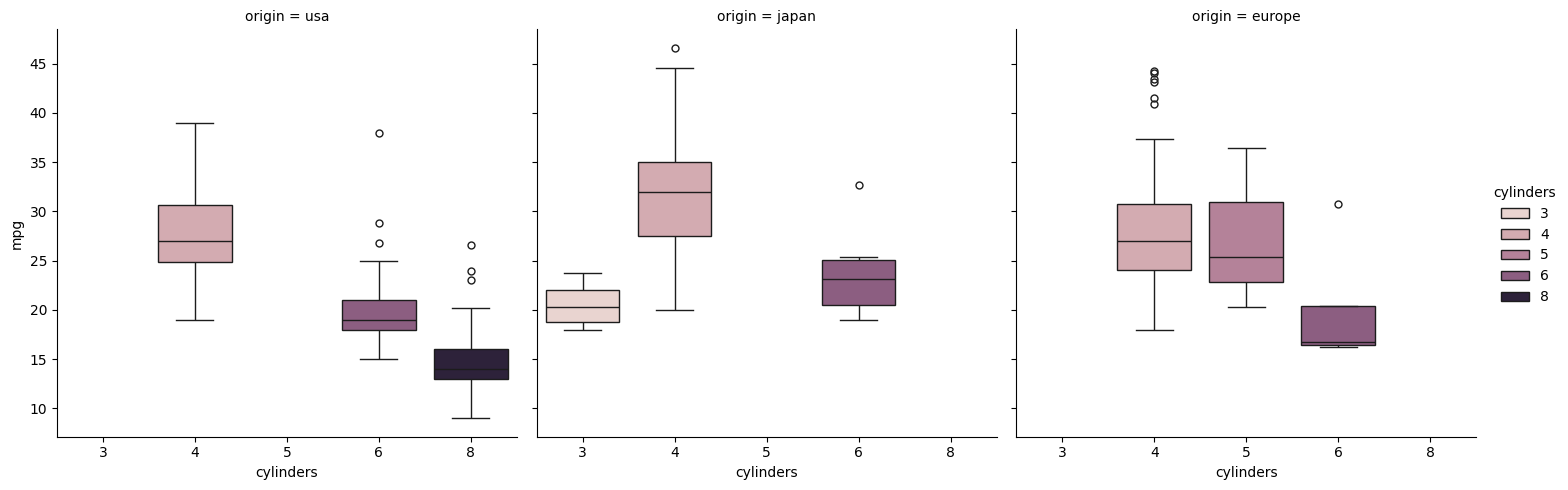

In [216]:
sns.catplot(data=mpg, x='cylinders', y='mpg', col='origin', kind='box', hue='cylinders')
# catplot에서 kind 파라미터의 값을 설정하지 않으면 point로 시각화
plt.show()


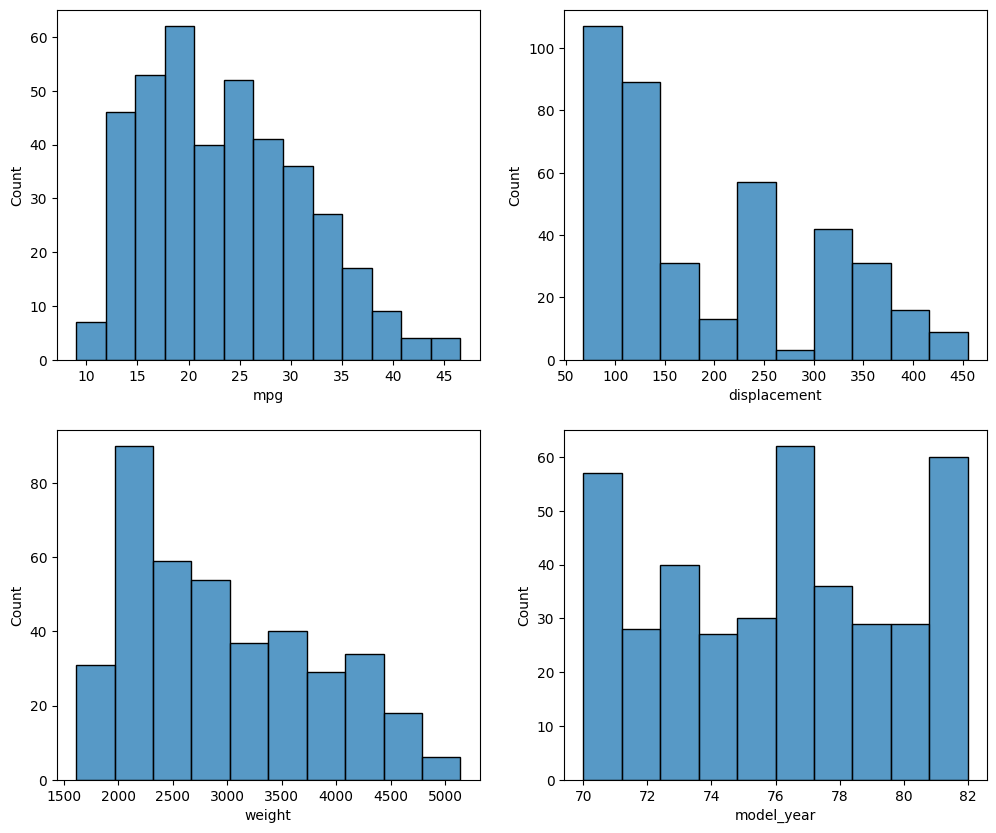

In [218]:
# Histogram
## 4개의 subplot을 생성 - mpg, displacement, weight, model_year histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))
sns.histplot(data=mpg, x='mpg', ax=axes[0][0])
sns.histplot(data=mpg, x='displacement', ax=axes[0][1])
sns.histplot(data=mpg, x='weight', ax=axes[1][0])
sns.histplot(data=mpg, x='model_year', ax=axes[1][1])
plt.show()

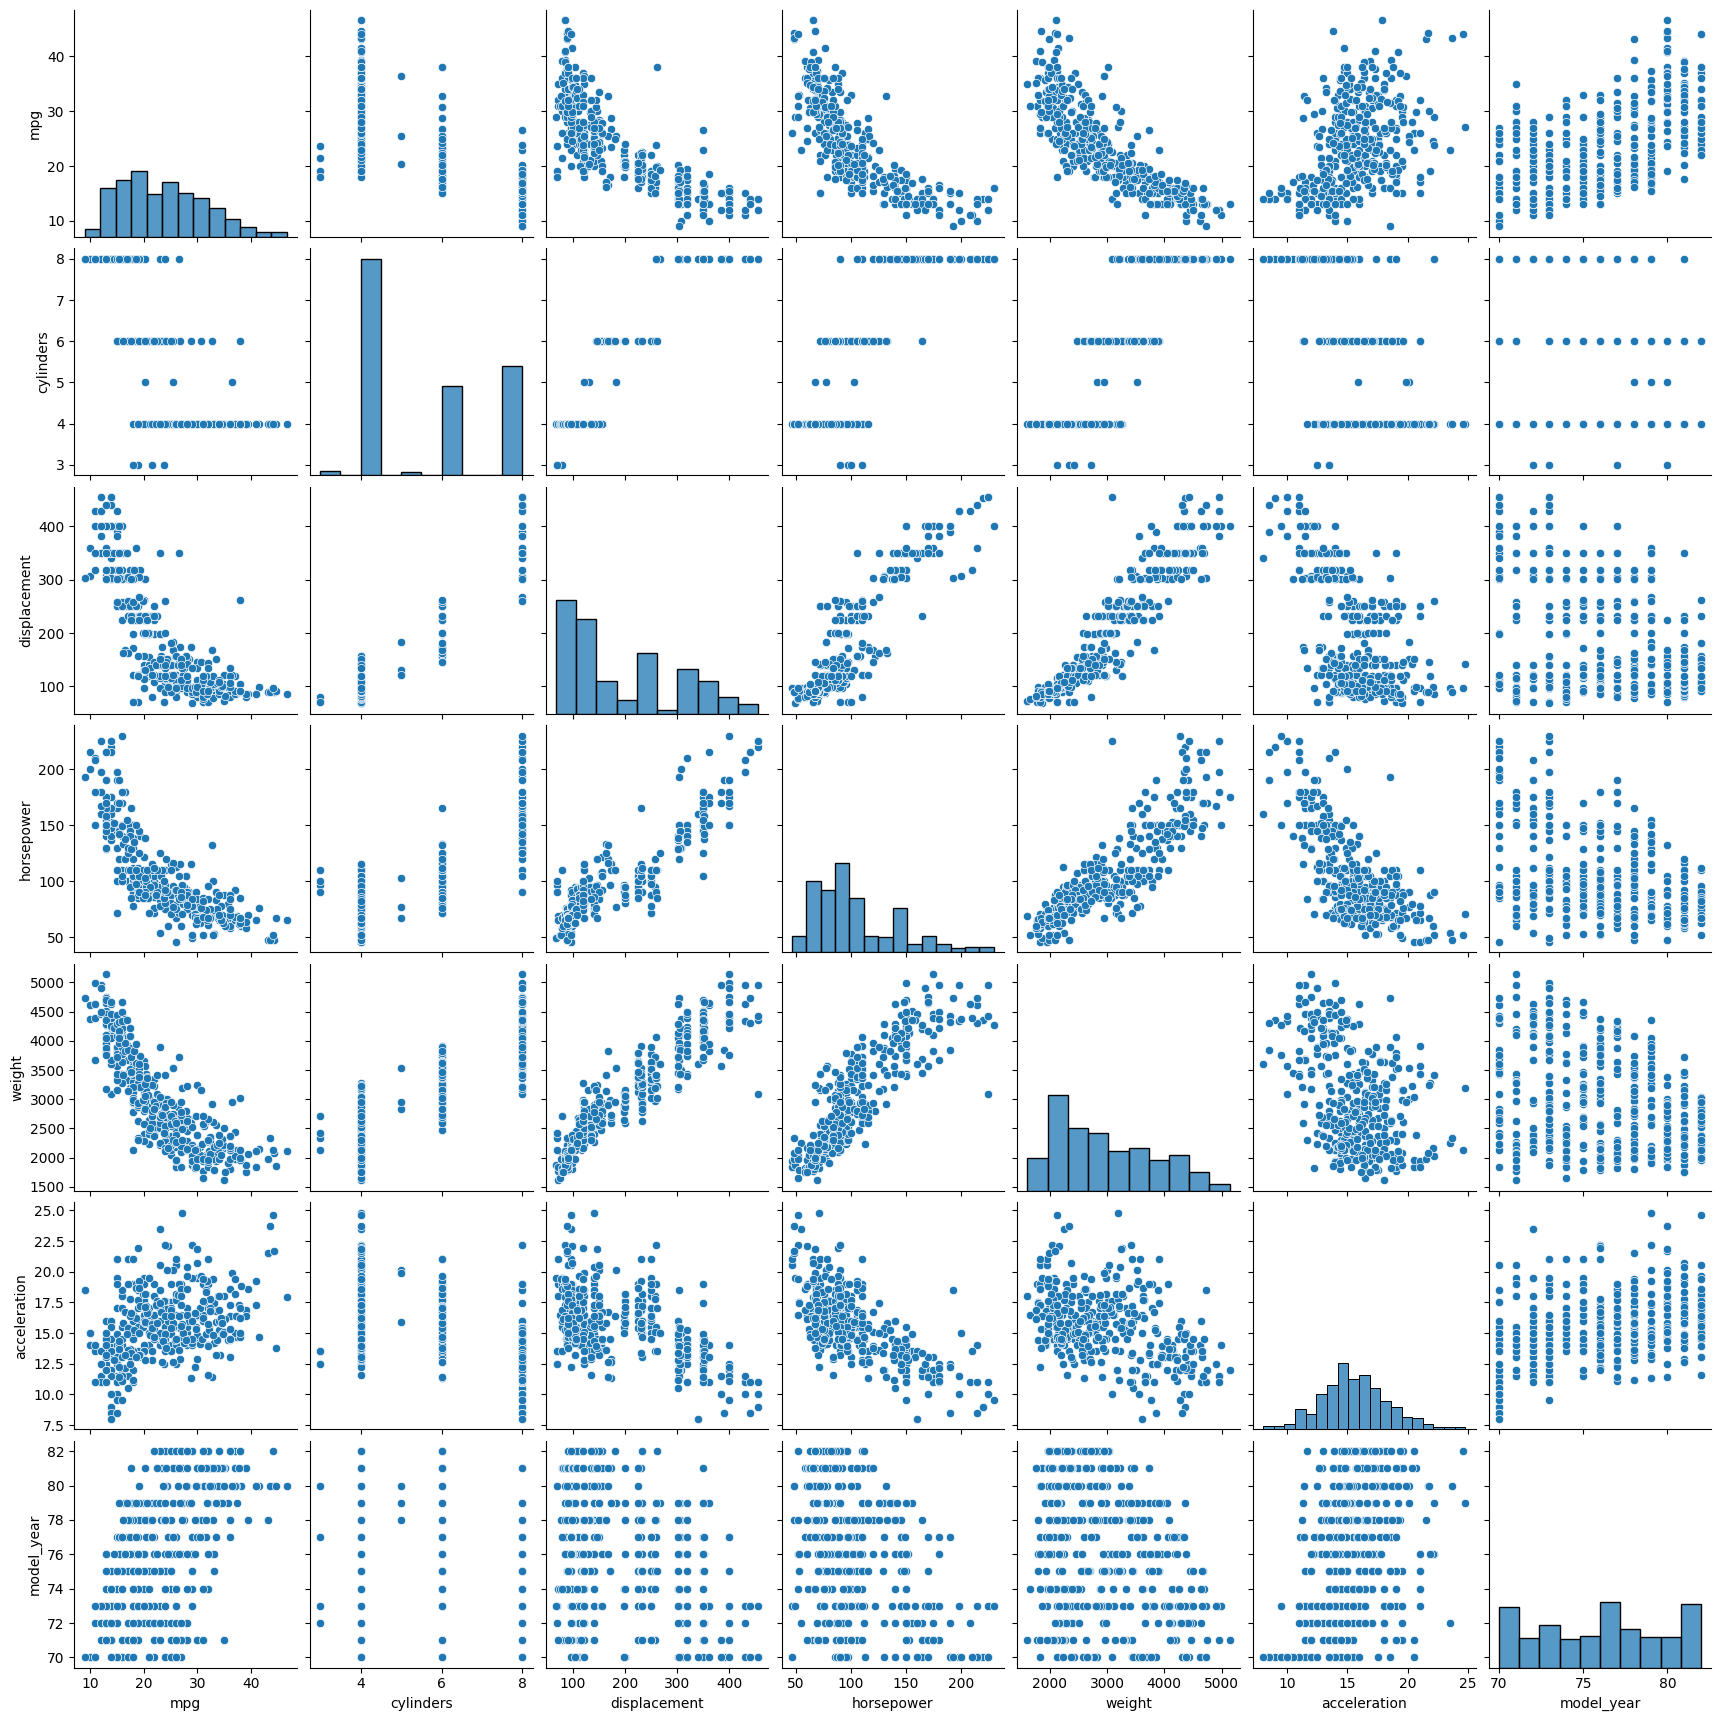

In [220]:
# Pair Plot
sns.pairplot(data=mpg)
plt.show()

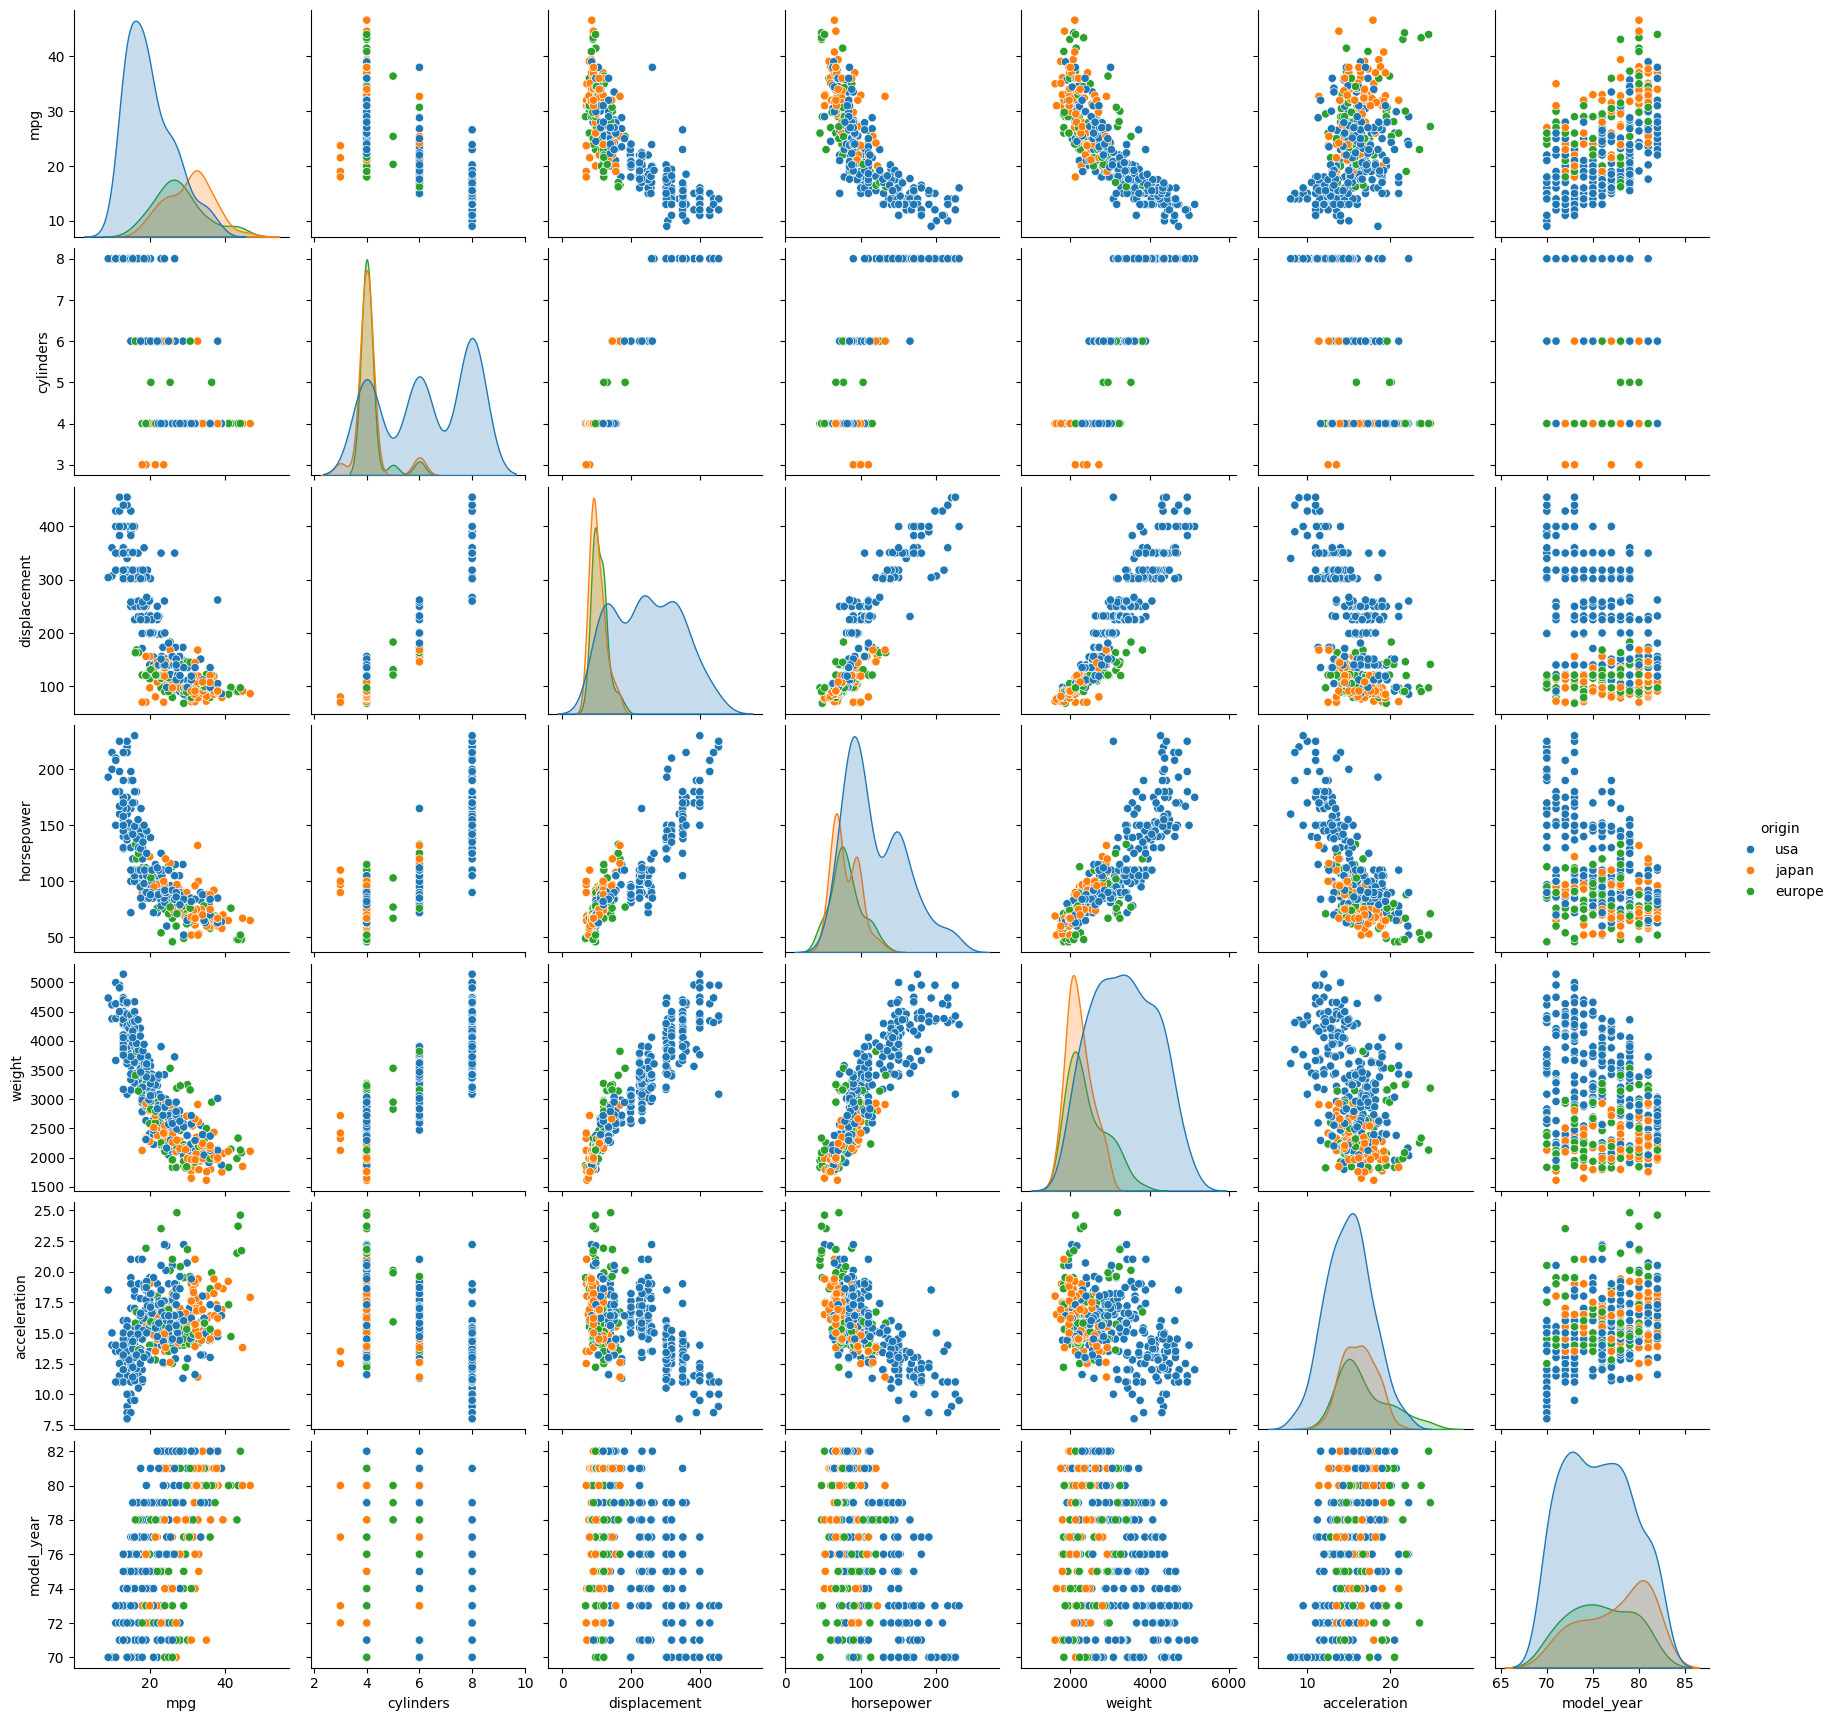

In [221]:
# Pair Plot
sns.pairplot(data=mpg, hue='origin')
plt.show()

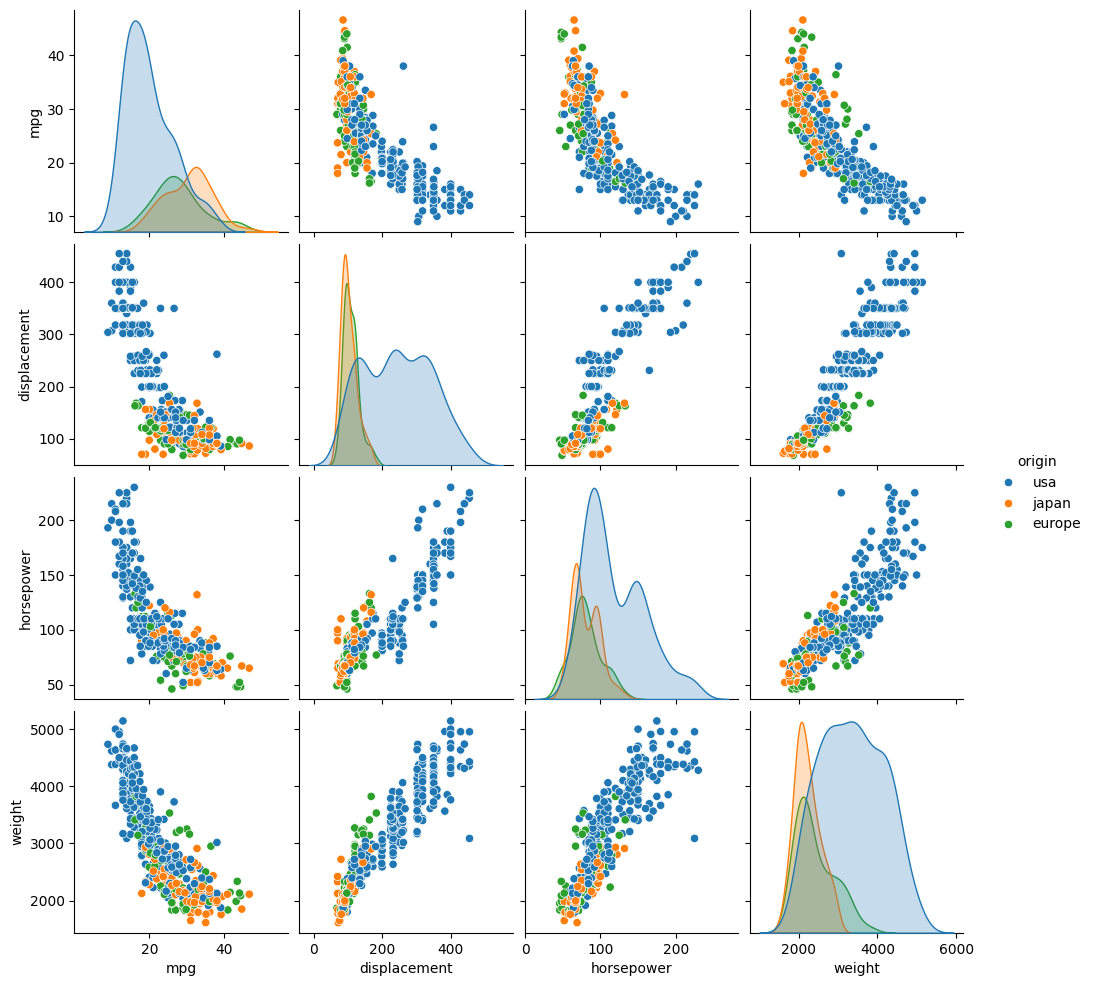

In [223]:
sns.pairplot(data=mpg, hue='origin', vars=['mpg', 'displacement', 'horsepower', 'weight'])
plt.show()